# Proyecto 2 “House Prices: Advanced Regression Techniques”

## 1. Importación de librerías y carga de datos
En esta sección importaremos las librerías necesarias y cargaremos el dataset de entrenamiento y prueba.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Para ver las gráficas de matplotlib "inline" en jupyter
%matplotlib inline

# Carga de los datos (modifica la ruta según tu entorno)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')  # Opcional, si necesitas el dataset de prueba para algún análisis adicional

# Dimensiones del dataset
print("Dimensiones del dataset de entrenamiento:", train.shape)
train.head()

Dimensiones del dataset de entrenamiento: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Revisión inicial de la estructura de los datos

En esta parte:
1. Observamos el tipo de cada columna (numérica o categórica).
2. Revisamos estadísticas descriptivas básicas de variables numéricas.

In [ ]:
# Información sobre tipos de datos y valores nulos
train.info()

# Descripción estadística de variables numéricas
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3. Análisis de valores faltantes

1. Identificamos qué columnas tienen más valores nulos.
2. Evaluamos la proporción de faltantes y decidimos si imputar o eliminar.
3. Revisamos si ciertas variables usan "NA" como categoría válida (ej. "No Garage").

In [ ]:
total_nulos = train.isnull().sum().sort_values(ascending=False)
porc_nulos = (train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

missing_data = pd.concat([total_nulos, porc_nulos], axis=1, keys=['Total', 'Porcentaje'])
missing_data.head(20)  # Muestra las 20 columnas con más valores nulos

,Total,Porcentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


## 4. Clasificación de variables

Separaremos las columnas en numéricas y categóricas, para tratarlas de manera distinta en nuestro análisis.

In [ ]:
numerical_feats = train.select_dtypes(include=[np.number]).columns
categorical_feats = train.select_dtypes(include=['object']).columns

print("Variables numéricas:", numerical_feats)
print("Variables categóricas:", categorical_feats)

Variables numéricas: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Variables categóricas: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFi

## 5. Análisis univariante de la variable objetivo (SalePrice)

SalePrice es la variable que queremos predecir. Revisamos su distribución y outliers.


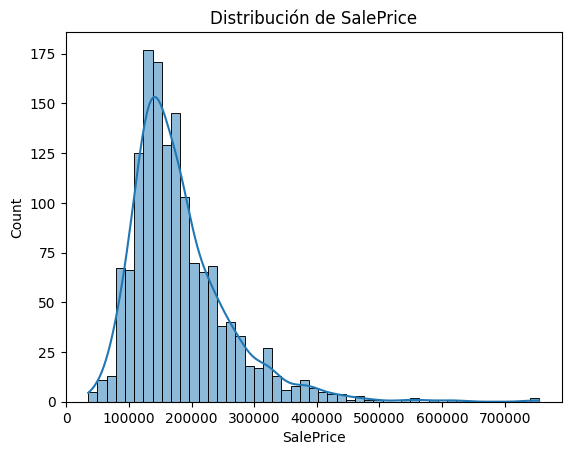

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


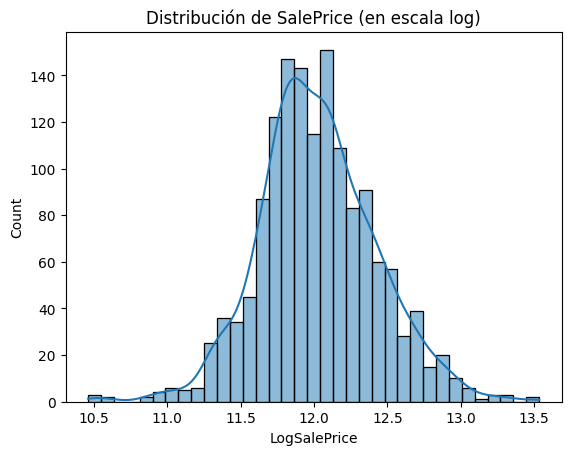

In [5]:
# Histograma y KDE de SalePrice
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.show()

# Estadísticos básicos
print(train['SalePrice'].describe())

# (Opcional) Transformación logarítmica para ver si se acerca más a la normal
train['LogSalePrice'] = np.log(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True)
plt.title('Distribución de SalePrice (en escala log)')
plt.show()

## 6. Análisis univariante de las demás variables

### 6.1 Variables numéricas

Generamos histogramas y curvas KDE para detectar asimetría, picos y presencia de outliers.

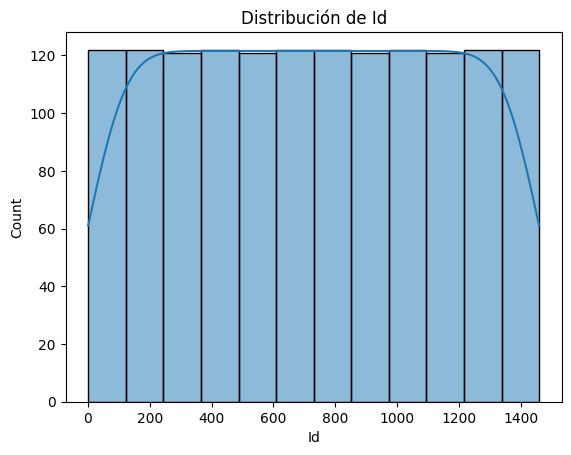

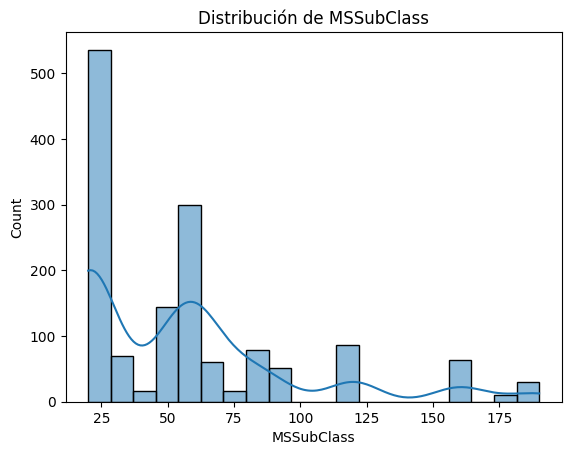

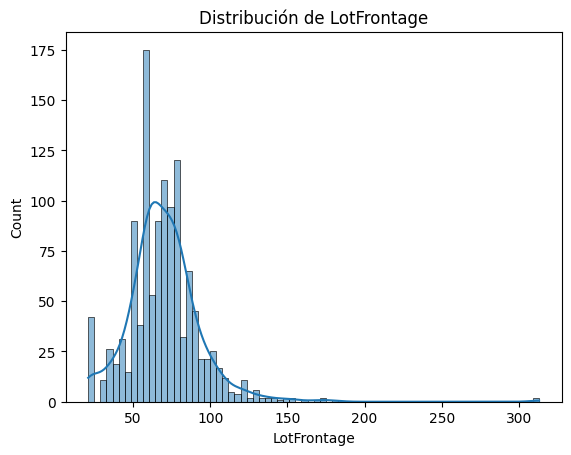

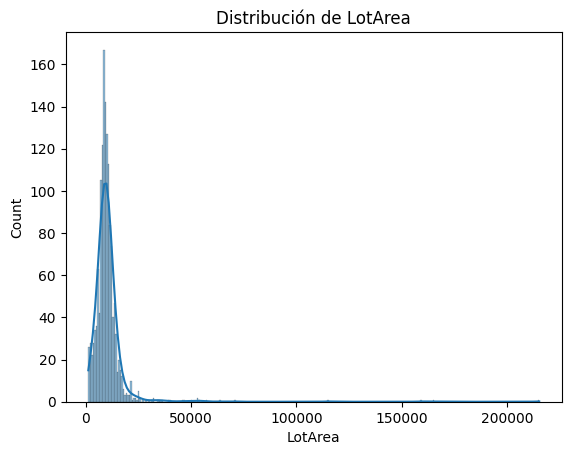

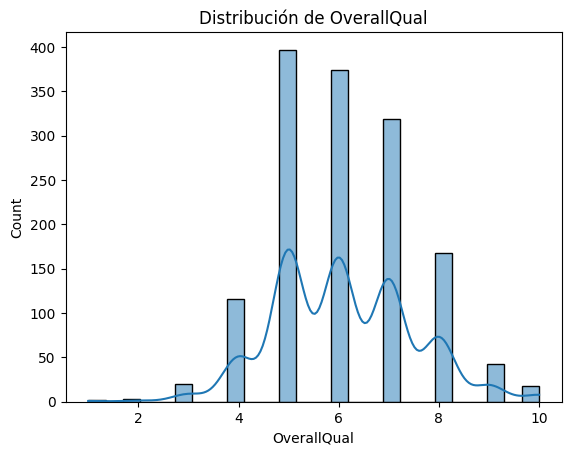

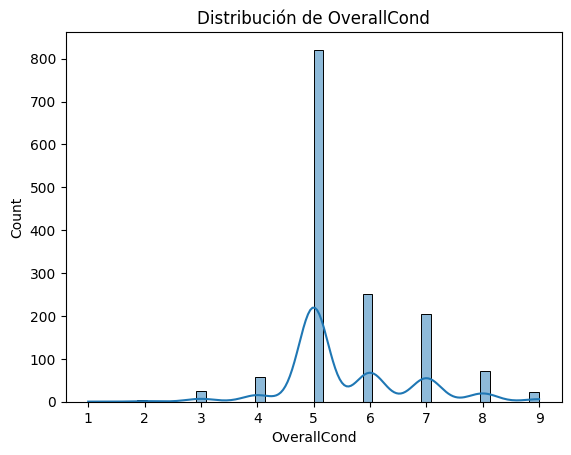

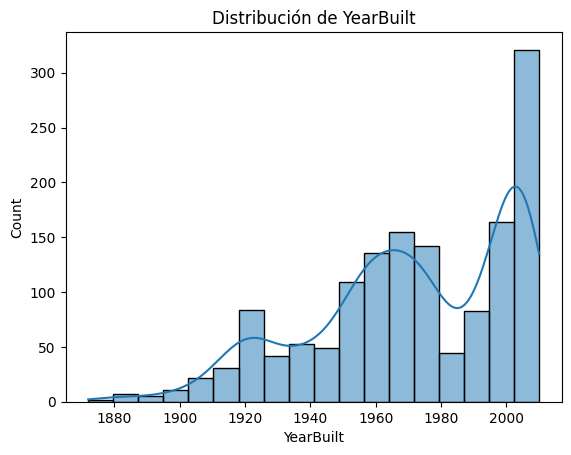

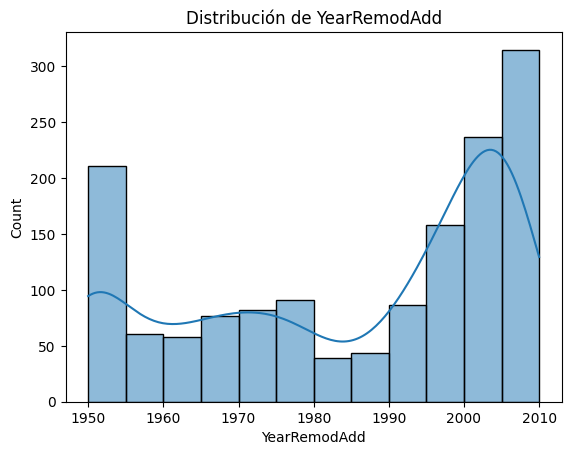

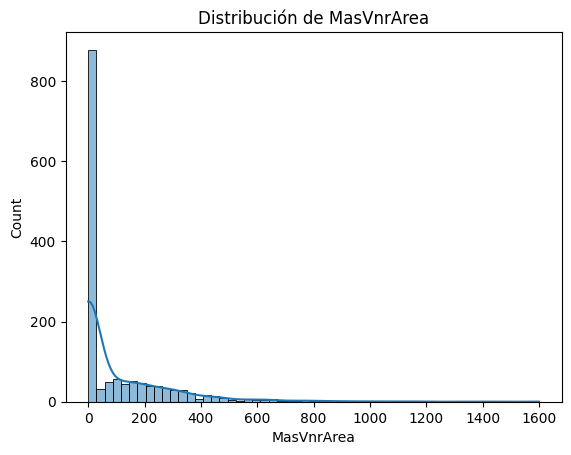

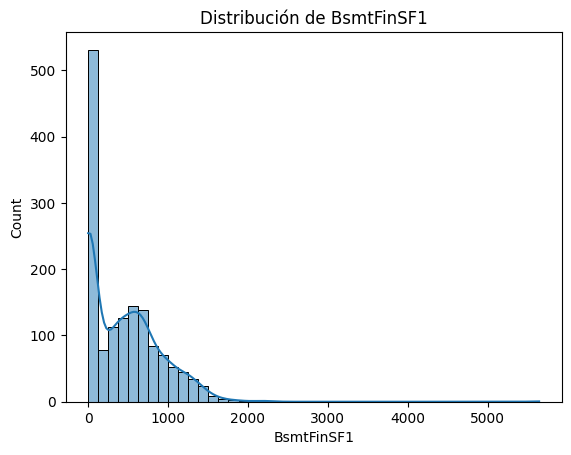

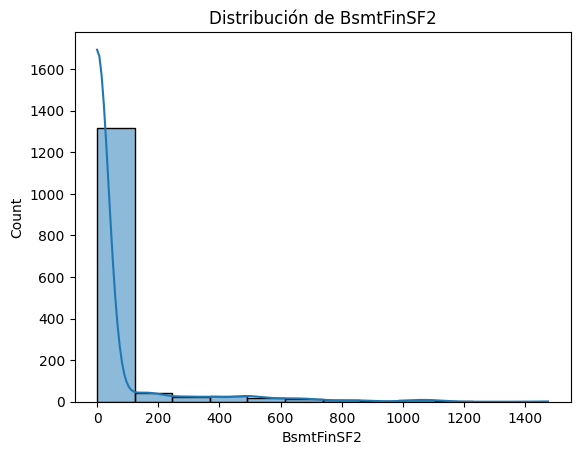

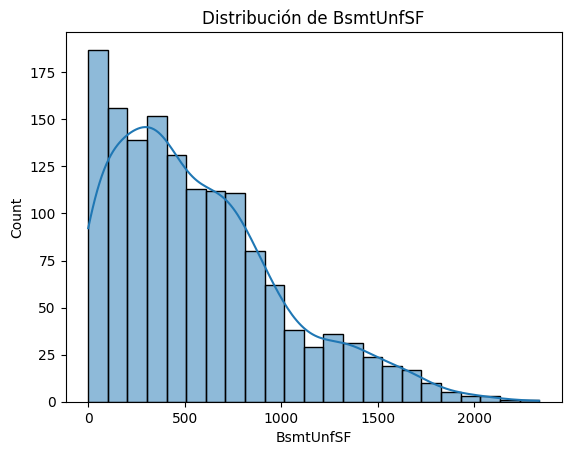

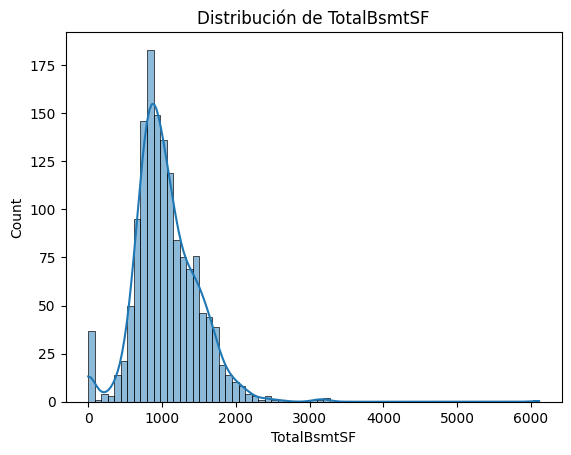

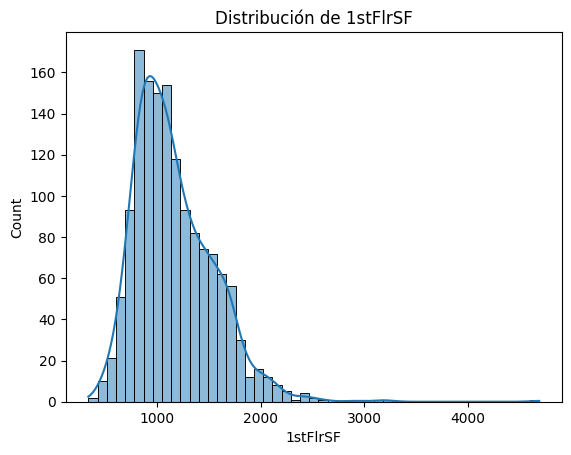

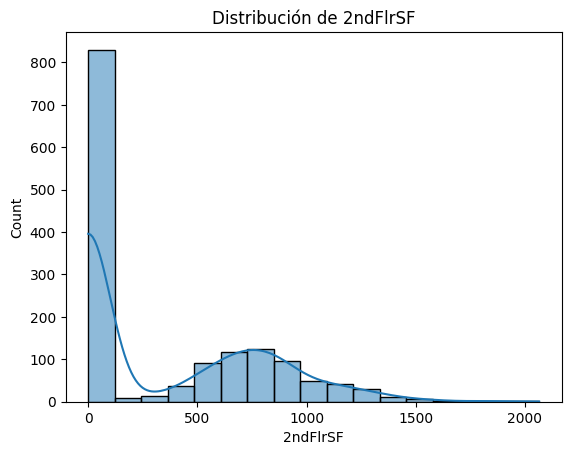

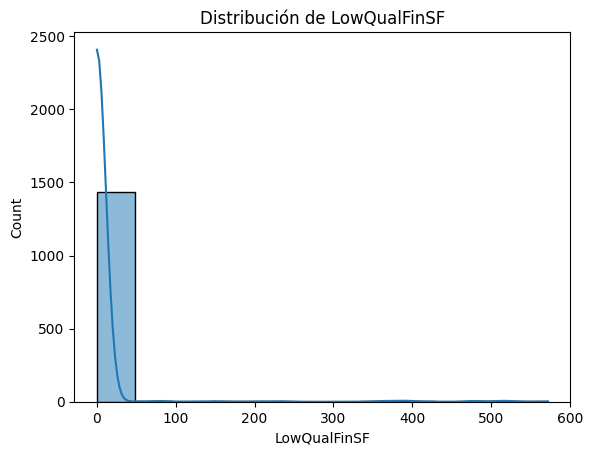

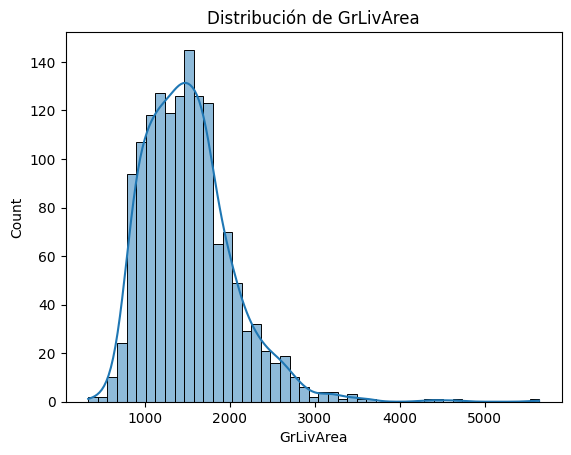

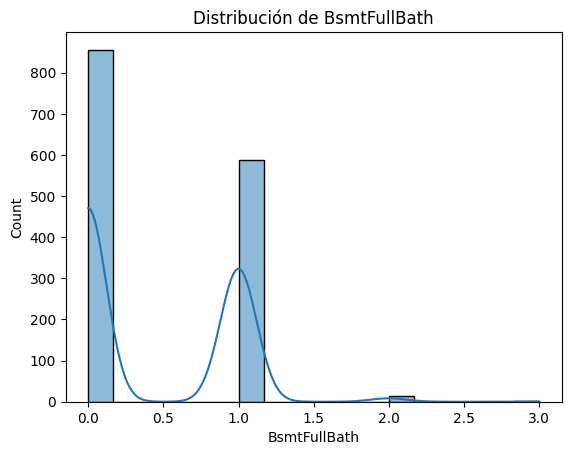

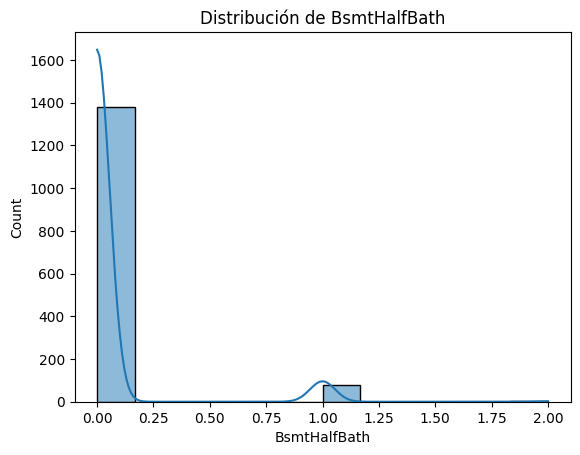

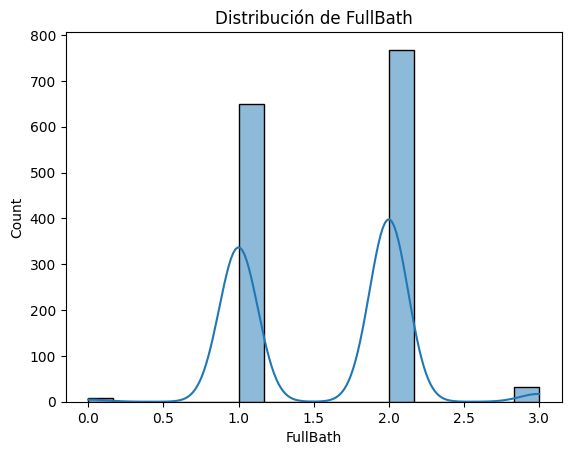

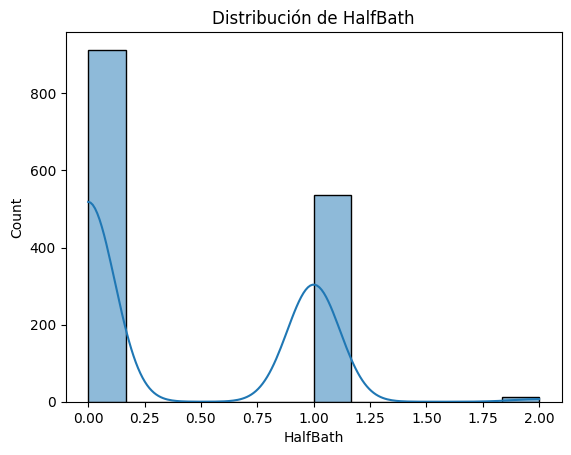

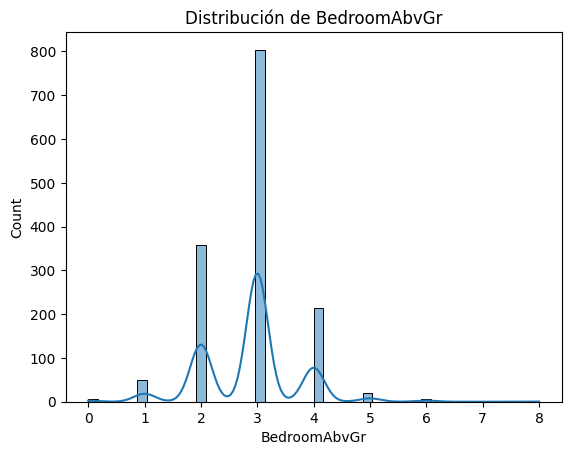

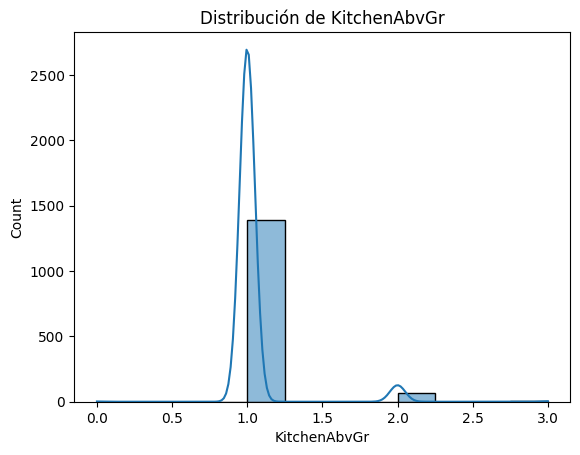

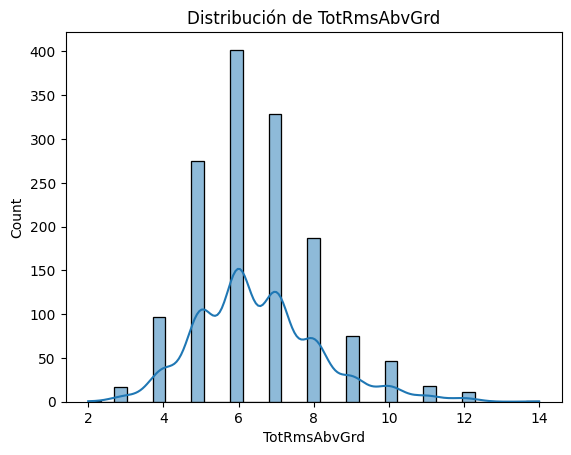

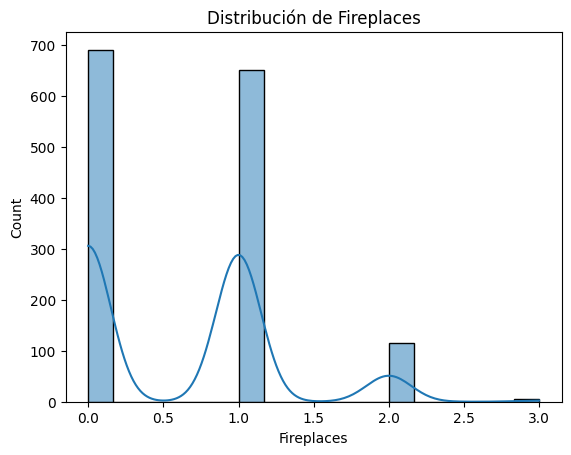

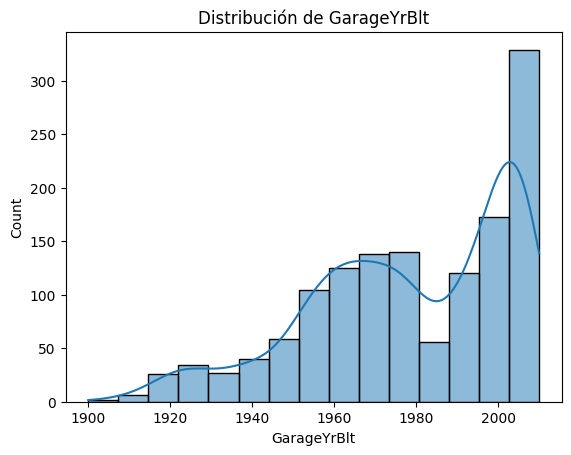

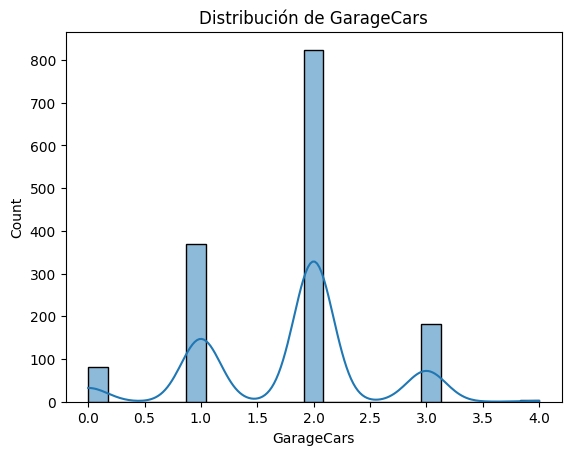

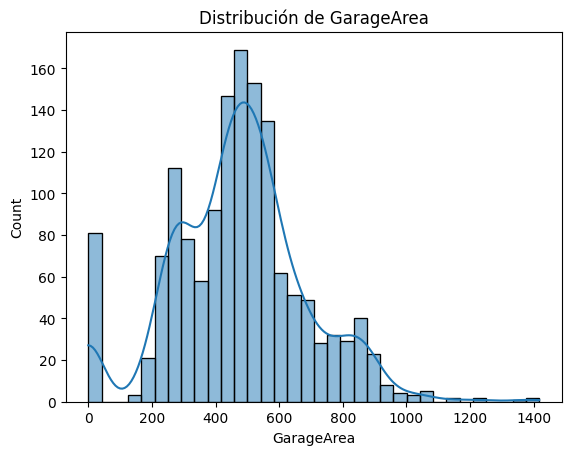

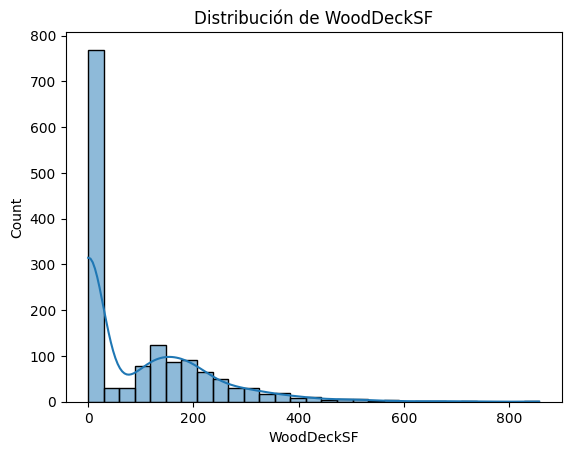

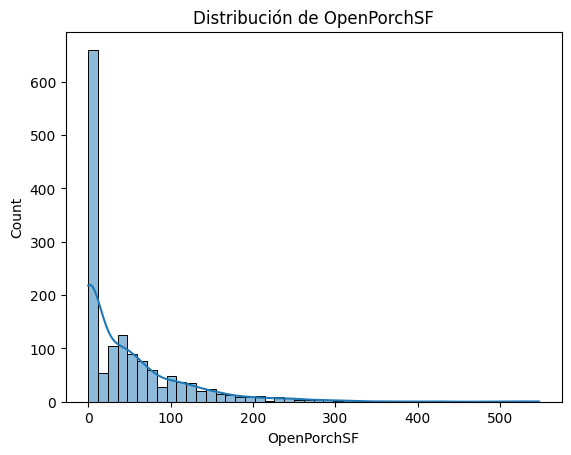

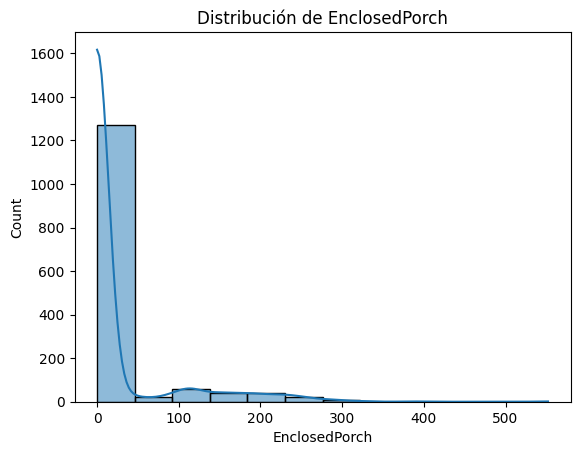

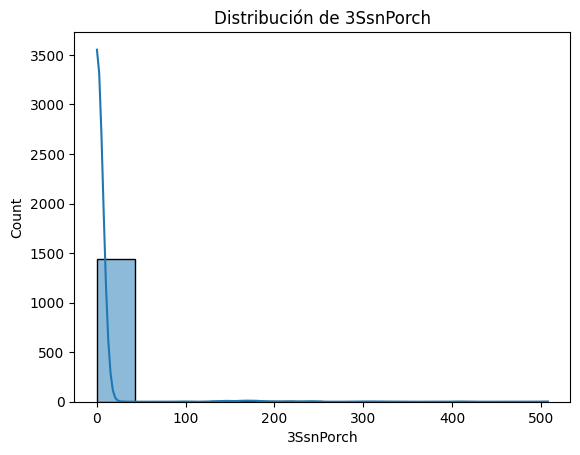

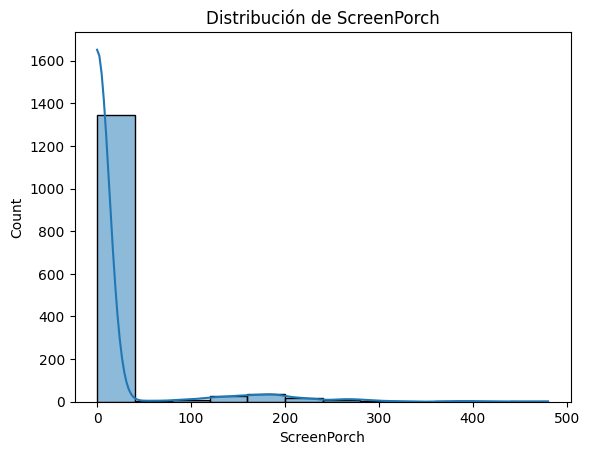

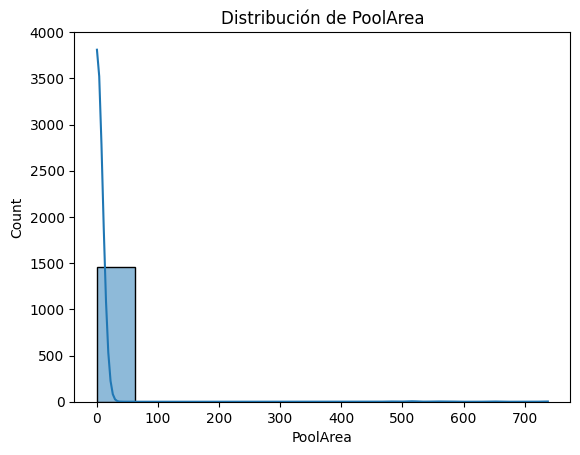

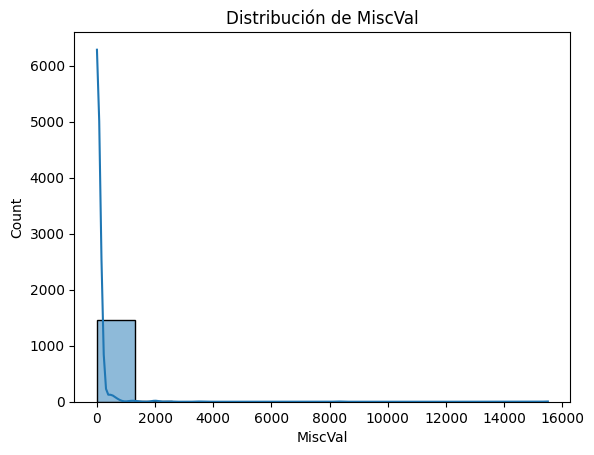

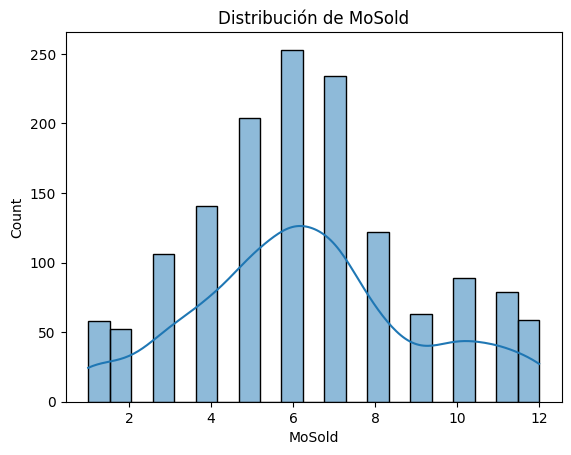

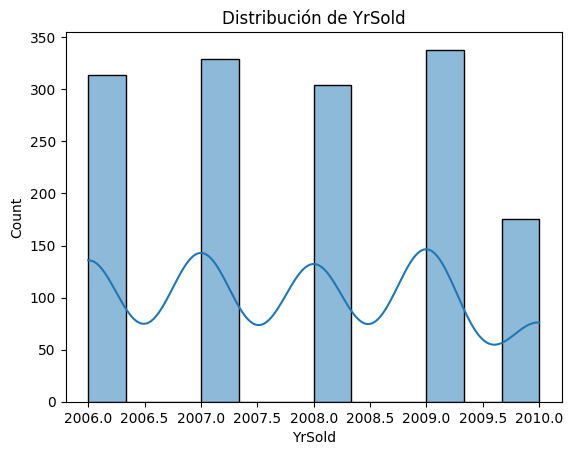

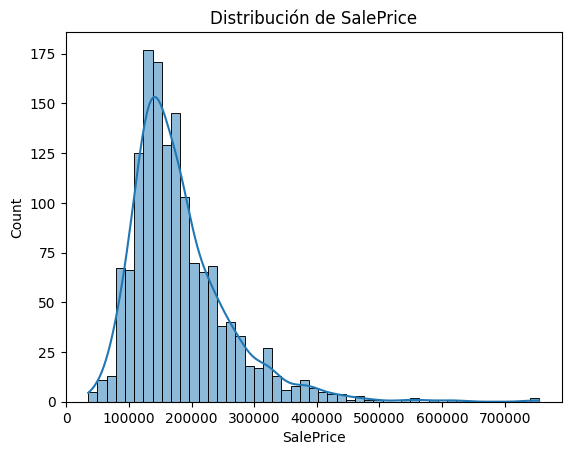

In [6]:
for col in numerical_feats:
    plt.figure()
    # Eliminamos NaN con dropna()
    sns.histplot(train[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

### 6.2 Variables categóricas

Mostramos cuántas entradas hay para cada categoría. Podemos usar gráficos de barras o tablas.

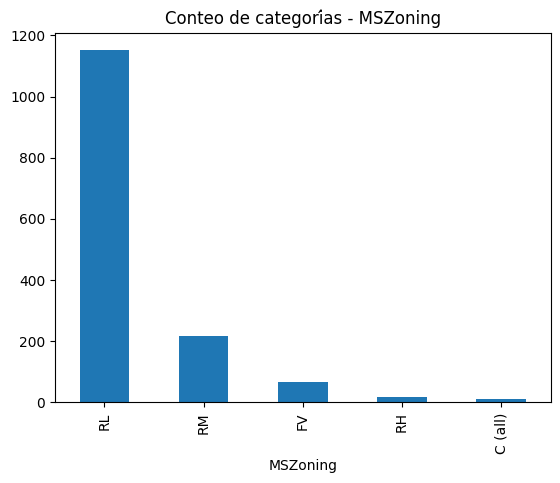

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

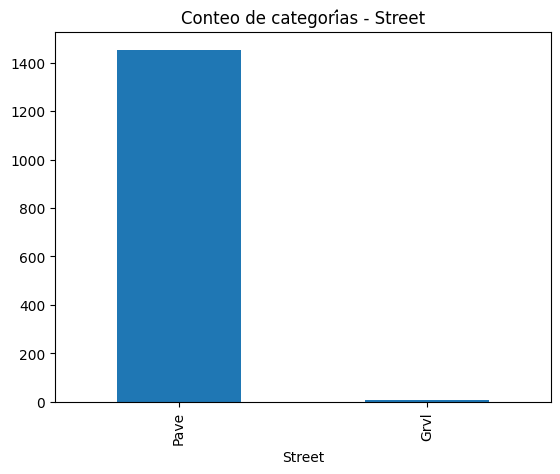

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

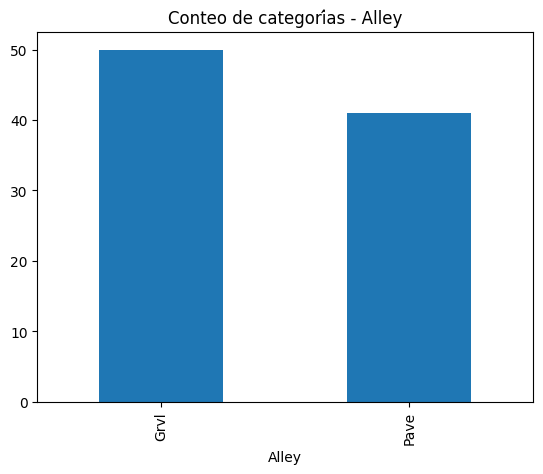

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

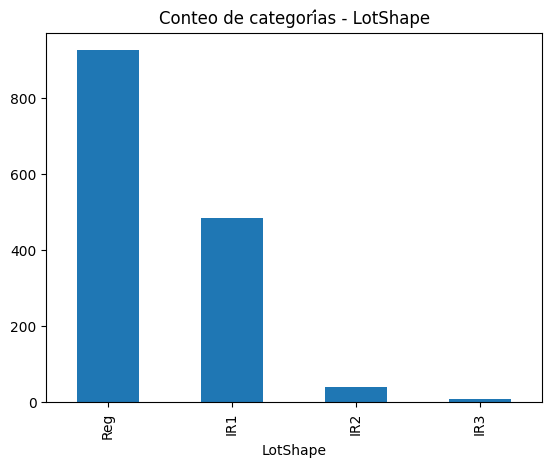

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

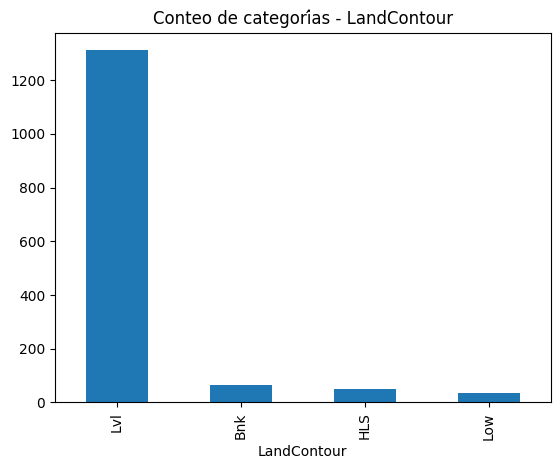

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

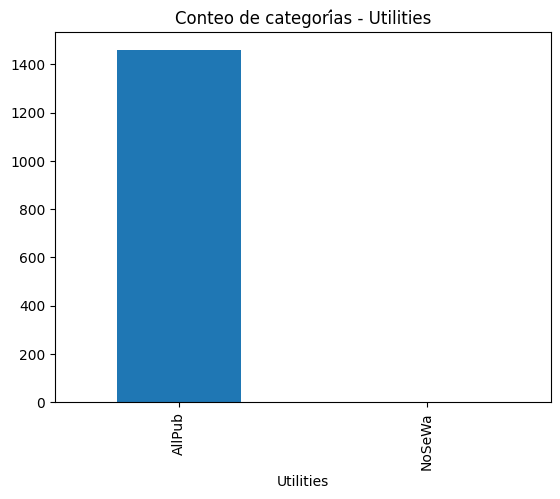

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

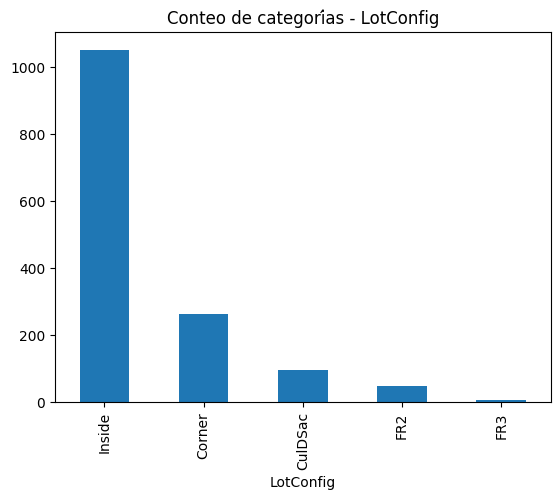

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

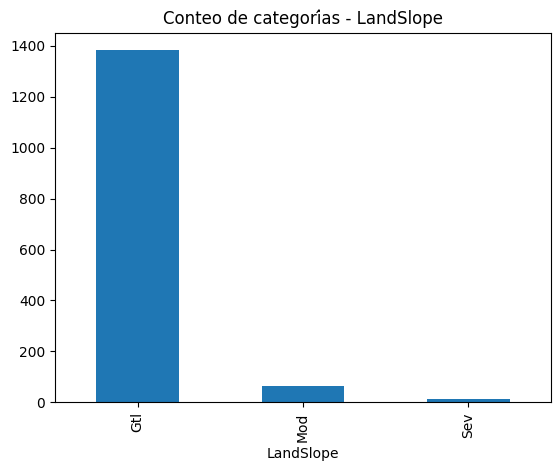

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

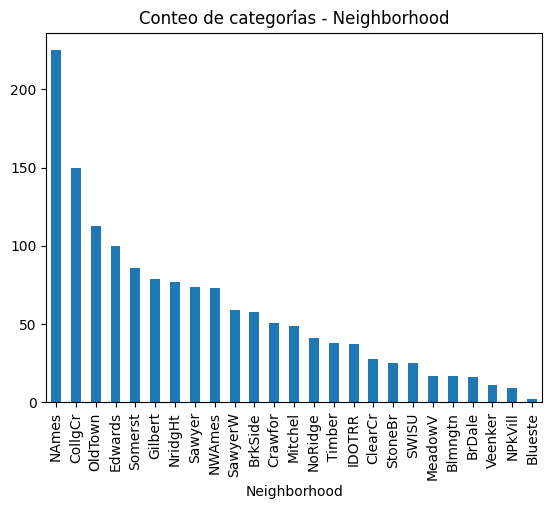

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

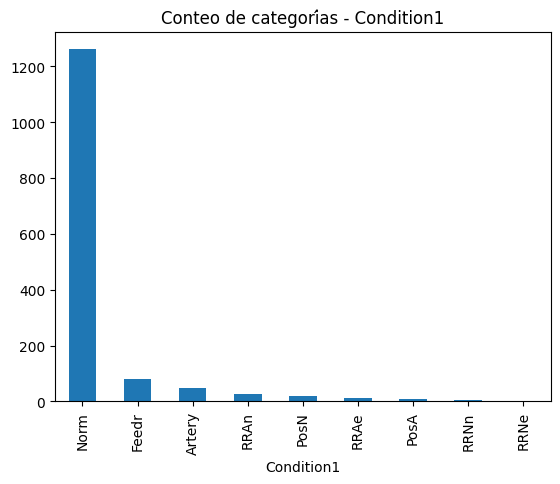

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

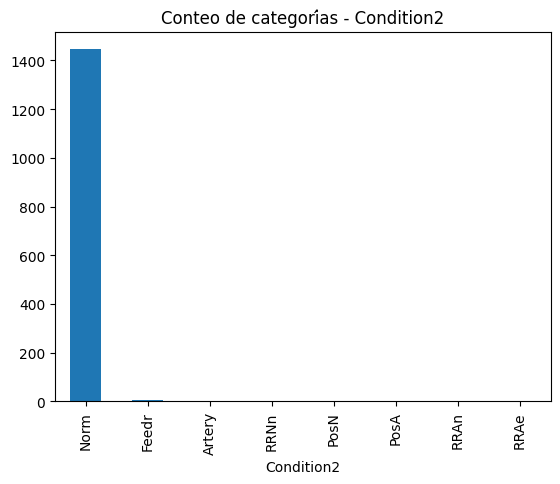

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

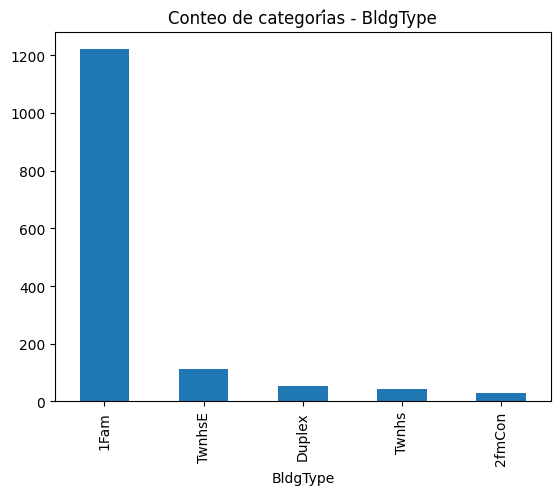

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

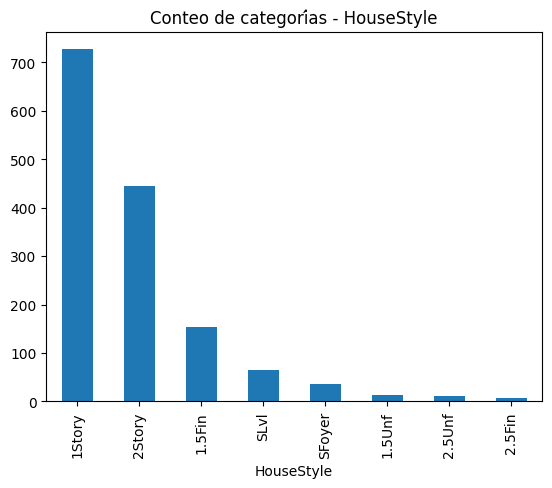

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

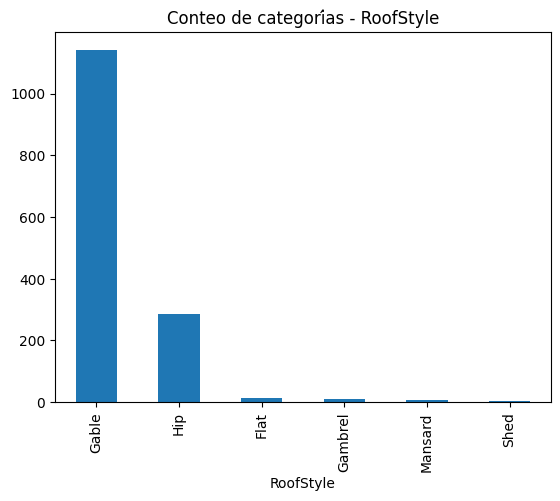

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

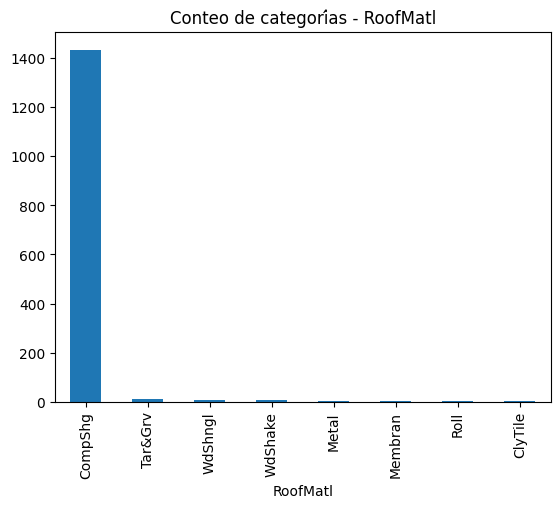

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

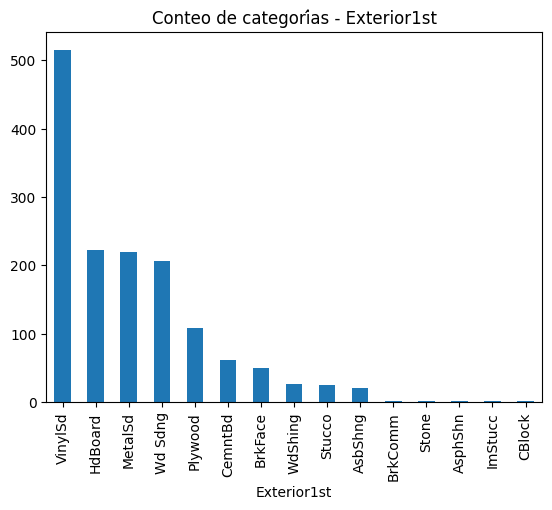

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

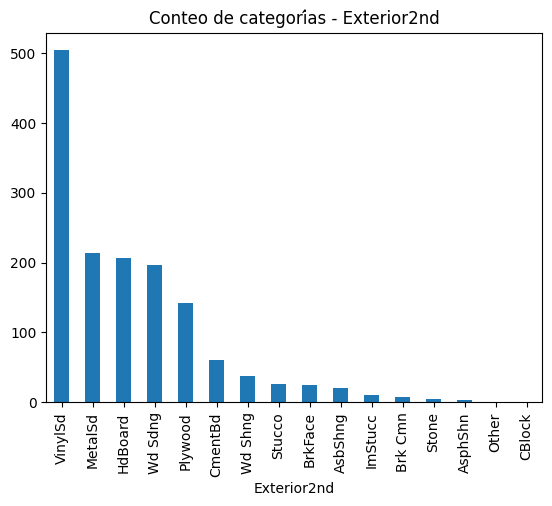

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

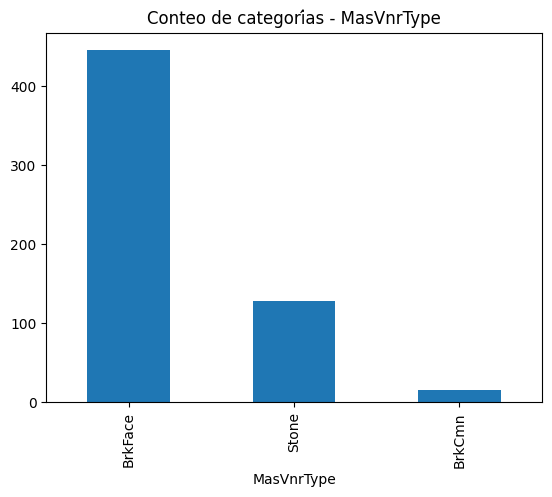

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

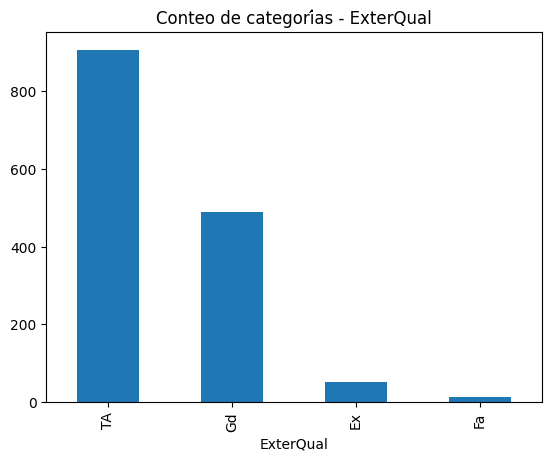

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

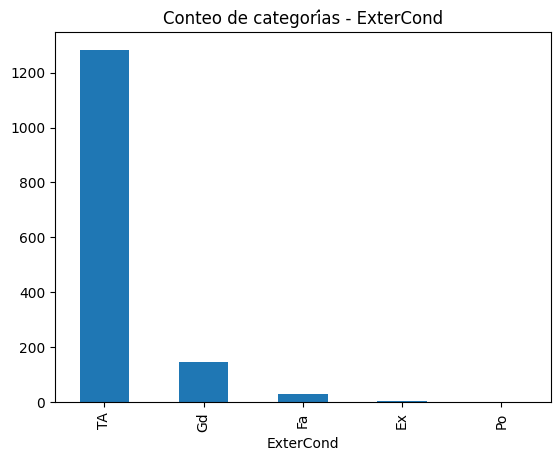

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

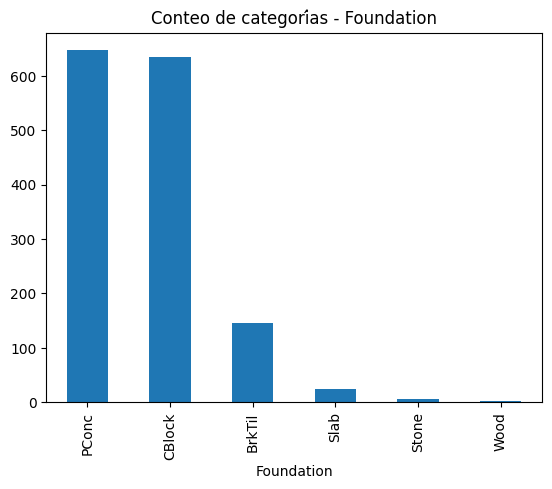

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

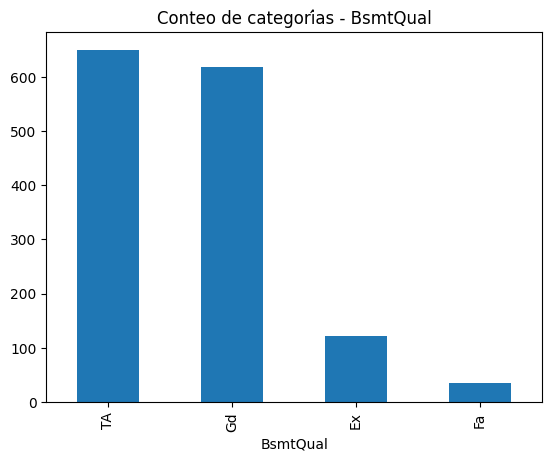

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

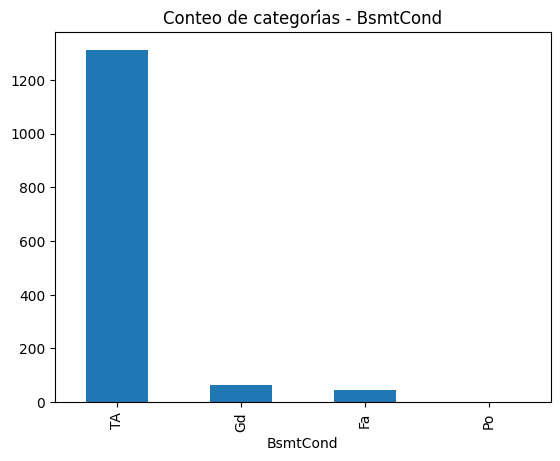

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

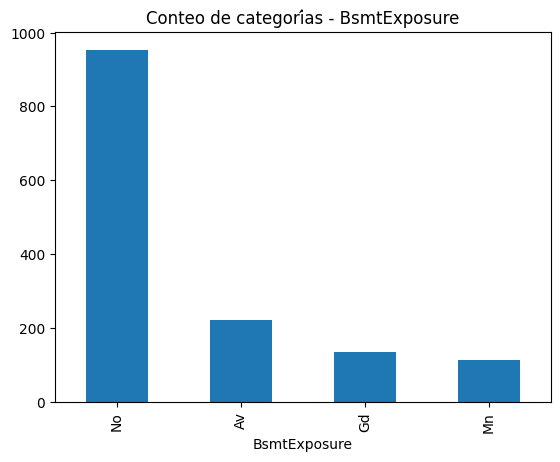

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

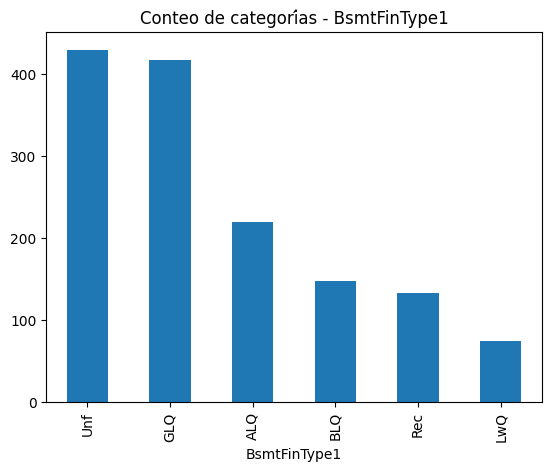

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

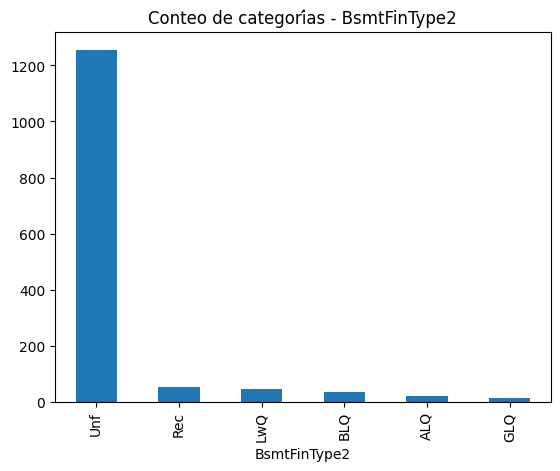

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

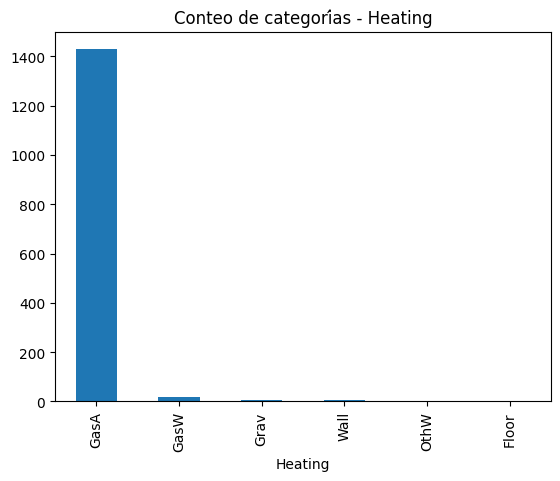

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

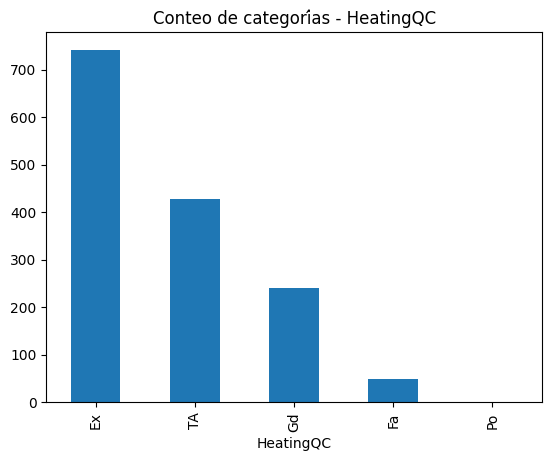

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

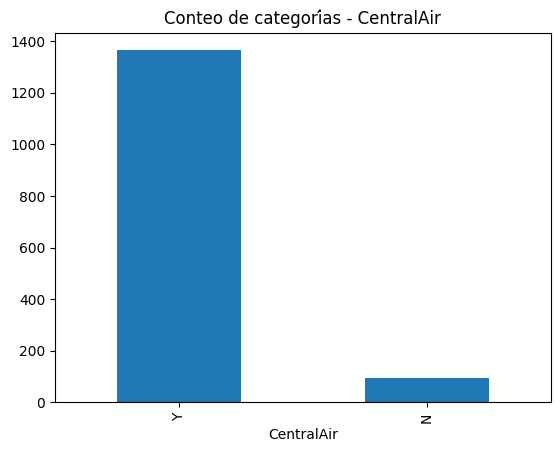

CentralAir
Y    1365
N      95
Name: count, dtype: int64

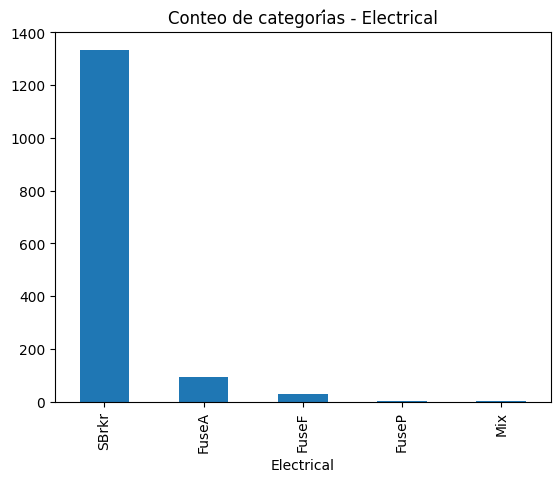

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

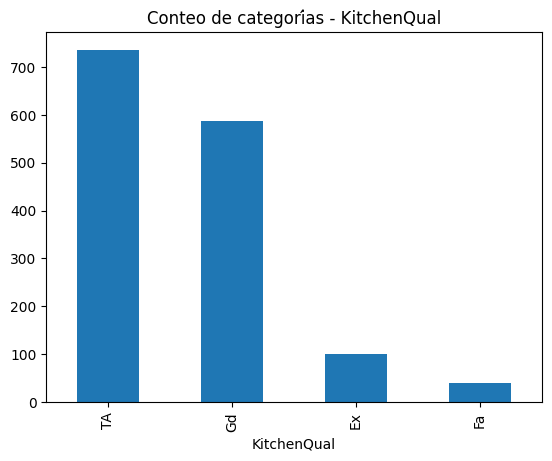

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

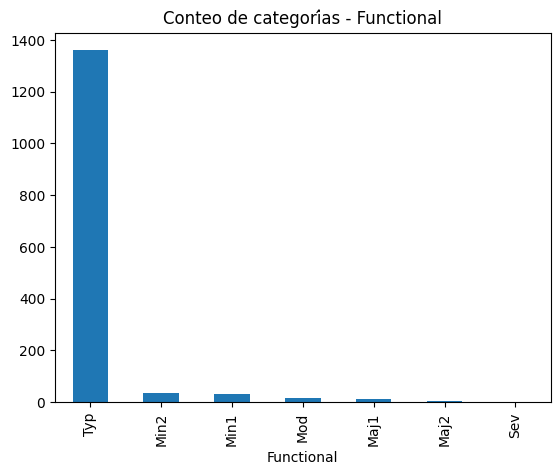

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

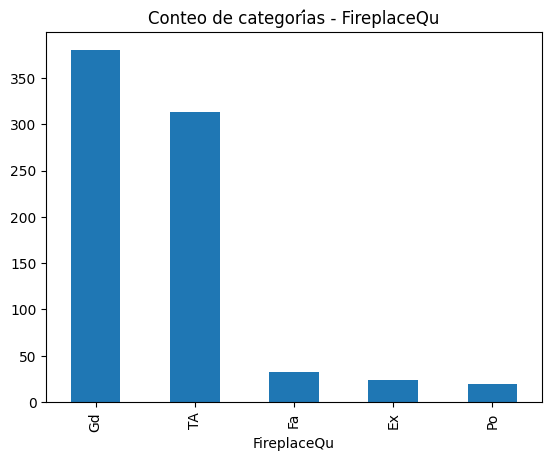

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

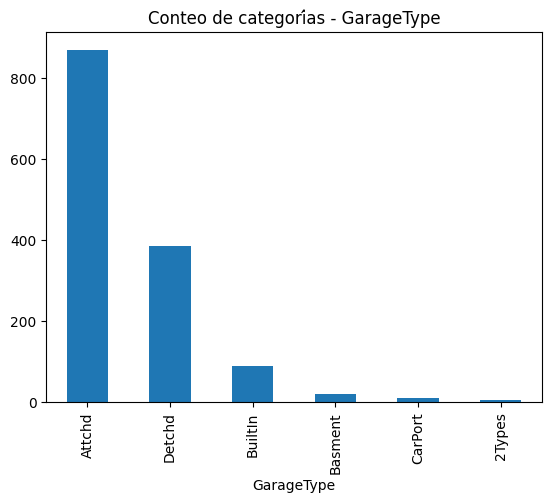

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

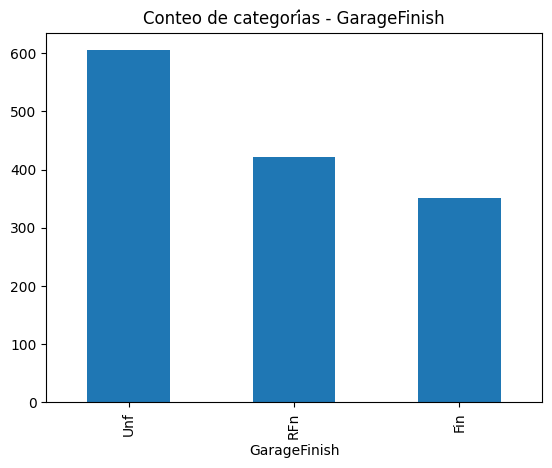

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

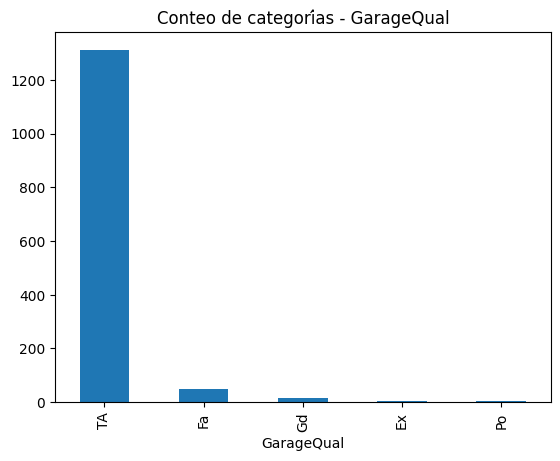

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

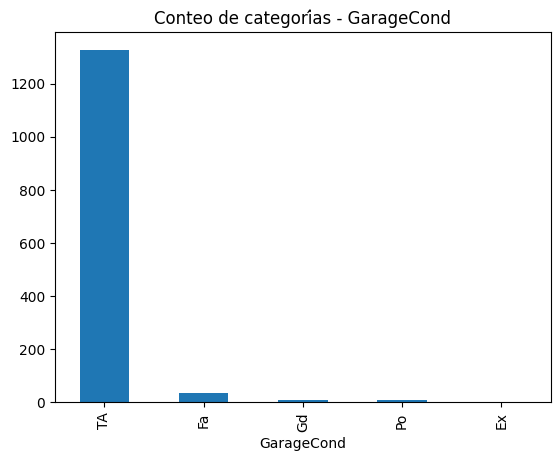

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

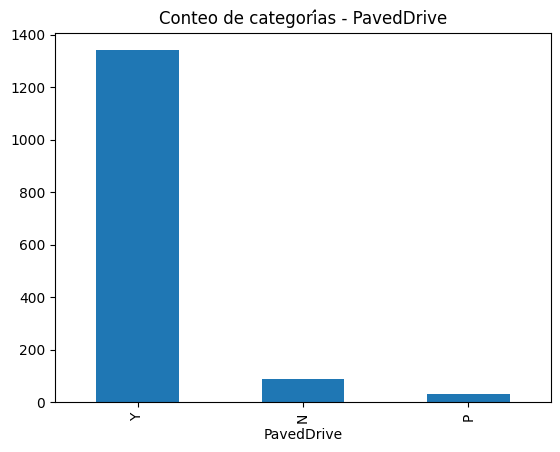

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

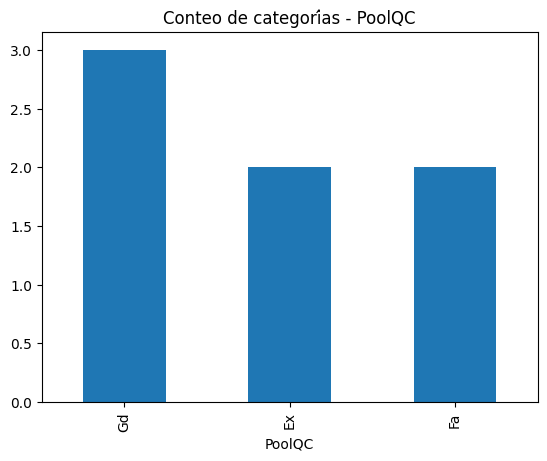

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

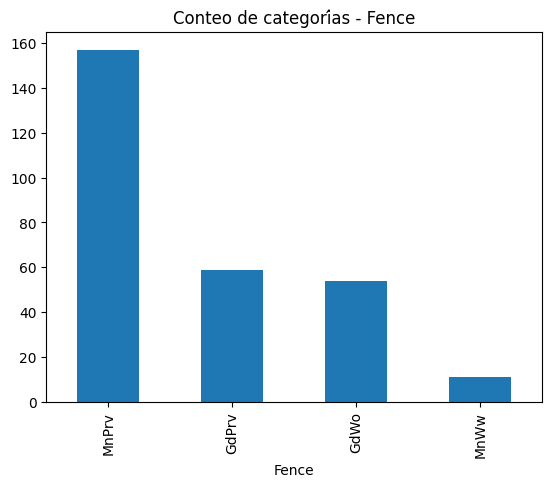

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

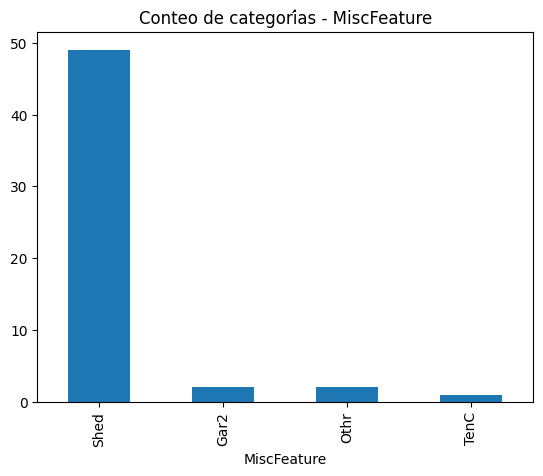

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

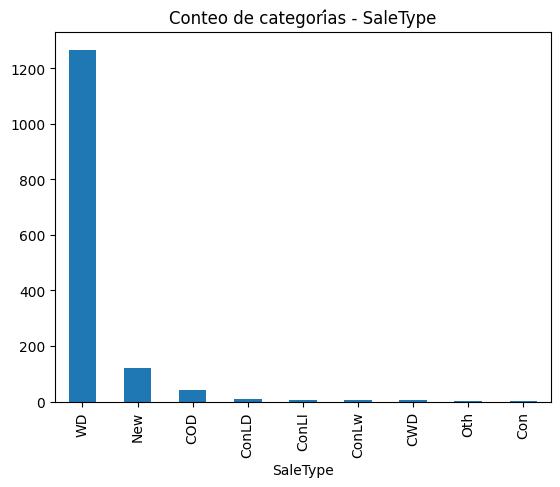

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

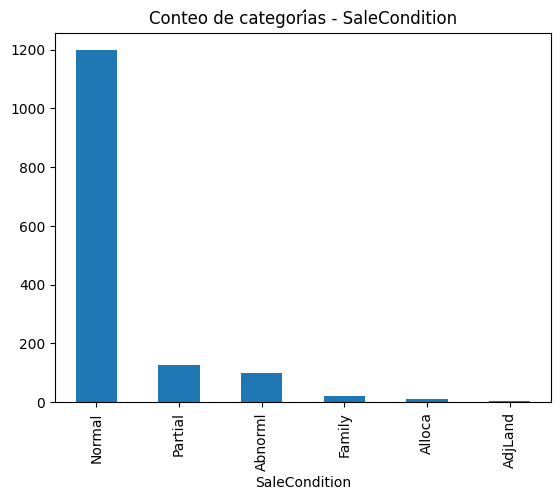

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [7]:
for col in categorical_feats:
    plt.figure()
    train[col].value_counts().plot(kind='bar')
    plt.title(f'Conteo de categorías - {col}')
    plt.show()

    # Si deseas ver la tabla numérica:
    display(train[col].value_counts())

## 7. Análisis bivariante: correlación con la variable objetivo (SalePrice)

1. Calculamos la correlación (Pearson) para variables numéricas.
2. Graficamos un heatmap de las más correlacionadas con SalePrice.
3. Vemos ejemplos de boxplots o scatterplots con variables que más destacan.


Variables con mayor correlación con SalePrice:
 SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


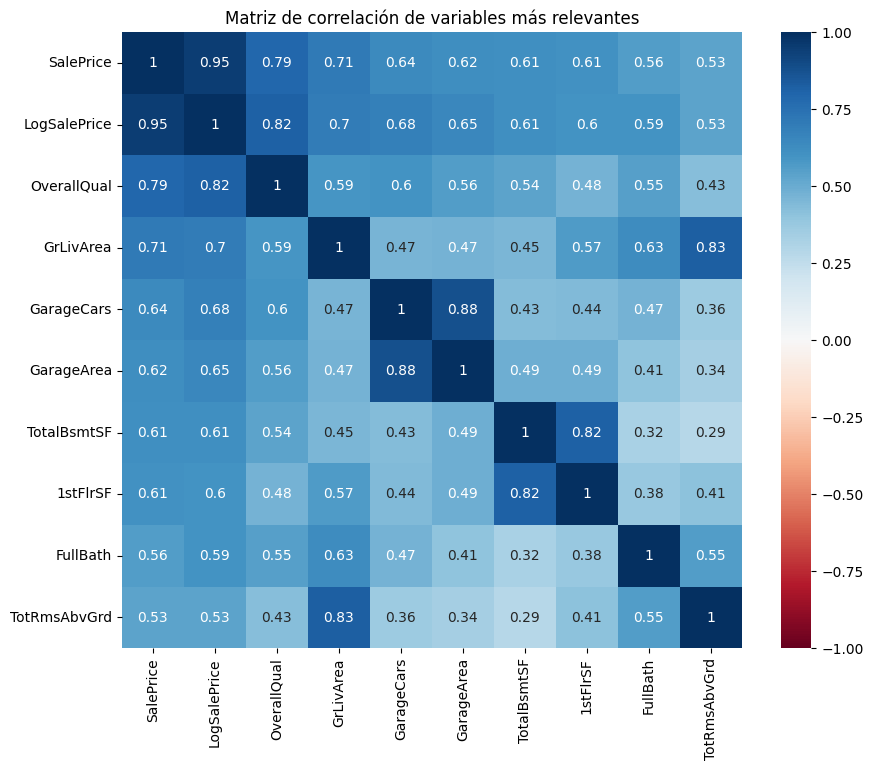

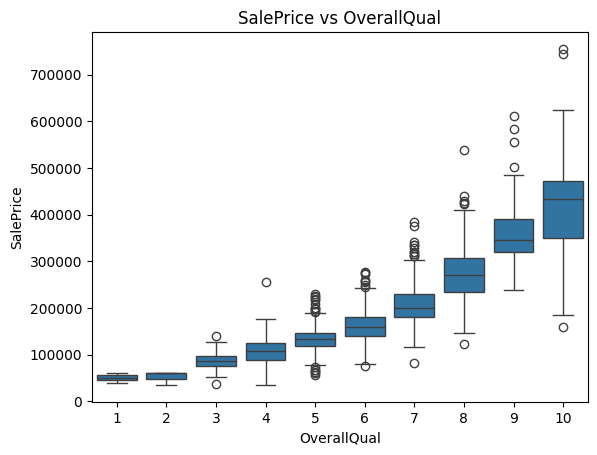

In [9]:
# Filtrar únicamente las columnas numéricas (asegúrate de que 'SalePrice' sea numérica).
numeric_df = train.select_dtypes(include=['int64','float64'])

# Matriz de correlación para ver relación con SalePrice (solo columnas numéricas)
corr_matrix = numeric_df.corr()

# Seleccionamos las 10 variables con mayor correlación (en valor absoluto) con SalePrice
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)
print("Variables con mayor correlación con SalePrice:\n", top_corr)

# Heatmap con las variables más correlacionadas
top_vars = top_corr.index
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_df[top_vars].corr(), 
            annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Matriz de correlación de variables más relevantes')
plt.show()

# Ejemplo de análisis con OverallQual o GrLivArea:
# Estas variables deben existir en train. 
# Si no las filtras, asegúrate de que la columna sea numérica.
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('SalePrice vs OverallQual')
plt.show()

## 8. Análisis de agrupamiento (Clustering)

Usamos K-Means para crear grupos de casas similares y describirlos.

         OverallQual    GrLivArea  GarageCars  TotalBsmtSF    YearBuilt
Cluster                                                                
0           5.898305  1893.214689    1.638418   889.451977  1927.355932
1           4.852814  1085.935065    1.021645   813.045455  1951.588745
2           8.040161  2098.714859    2.650602  1620.738956  1999.867470
3           6.323427  1491.601399    2.024476  1061.578671  1988.300699


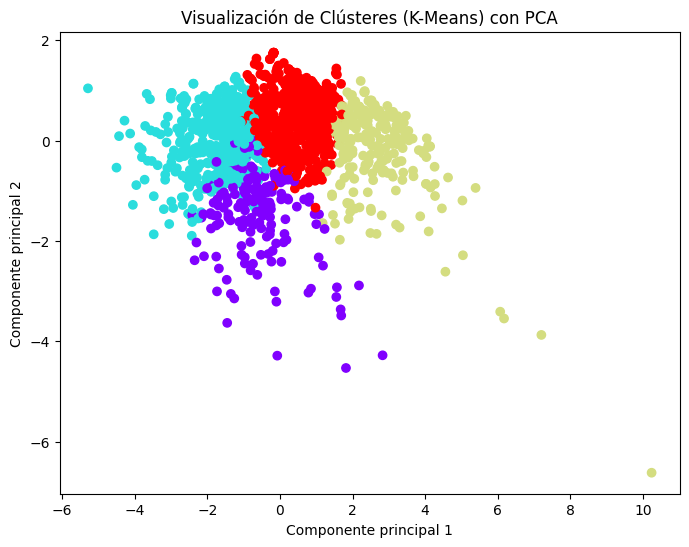

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecciona algunas variables numéricas representativas
cluster_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
df_cluster = train[cluster_features].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# K-Means (k=4 como ejemplo)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

df_cluster['Cluster'] = labels
cluster_summary = df_cluster.groupby('Cluster')[cluster_features].mean()
print(cluster_summary)

# PCA para visualización en 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización de Clústeres (K-Means) con PCA')
plt.show()

## 9. División del Dataset en conjuntos de Entrenamiento y Prueba

Separamos aleatoriamente el conjunto de datos preprocesados ya que se trata de una regresión y no de una clasificación o balanceo.

In [28]:
# 1. Eliminar columnas con más del 50% de valores nulos
threshold = 0.5  
missing_fraction = train.isnull().sum() / len(train)
columns_to_drop = missing_fraction[missing_fraction > threshold].index
df_cleaned = train.drop(columns=columns_to_drop)

# 2. Imputar valores faltantes
# Para variables numéricas, rellenamos con la mediana
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Para variables categóricas, rellenamos con el valor más frecuente (moda)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 3. Codificar variables categóricas
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Guardamos los codificadores por si se necesitan luego

# 4. Escalar variables numéricas
scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

# 5. Dividir en entrenamiento y prueba (80% - 20%)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, train_size=0.8)

# Guardar los conjuntos preprocesados, comentamos esto porque se crean los archivos csv cada que se ejecuta
#train_path = "train_preprocessed.csv"
#test_path = "test_preprocessed.csv"

#train_df.to_csv(train_path, index=False)
#test_df.to_csv(test_path, index=False)

# Mostrar el número de filas en cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {len(train_df)} filas")
print(f"Tamaño del conjunto de prueba: {len(test_df)} filas")

Tamaño del conjunto de entrenamiento: 1168 filas
Tamaño del conjunto de prueba: 292 filas


## 10. Ingeniería de características 

Para determinar qué variables pueden ser los mejores predictores para el precio de las casas, nos basamos en la matriz de correlación de las variables más relevantes con respecto a SalePrice 

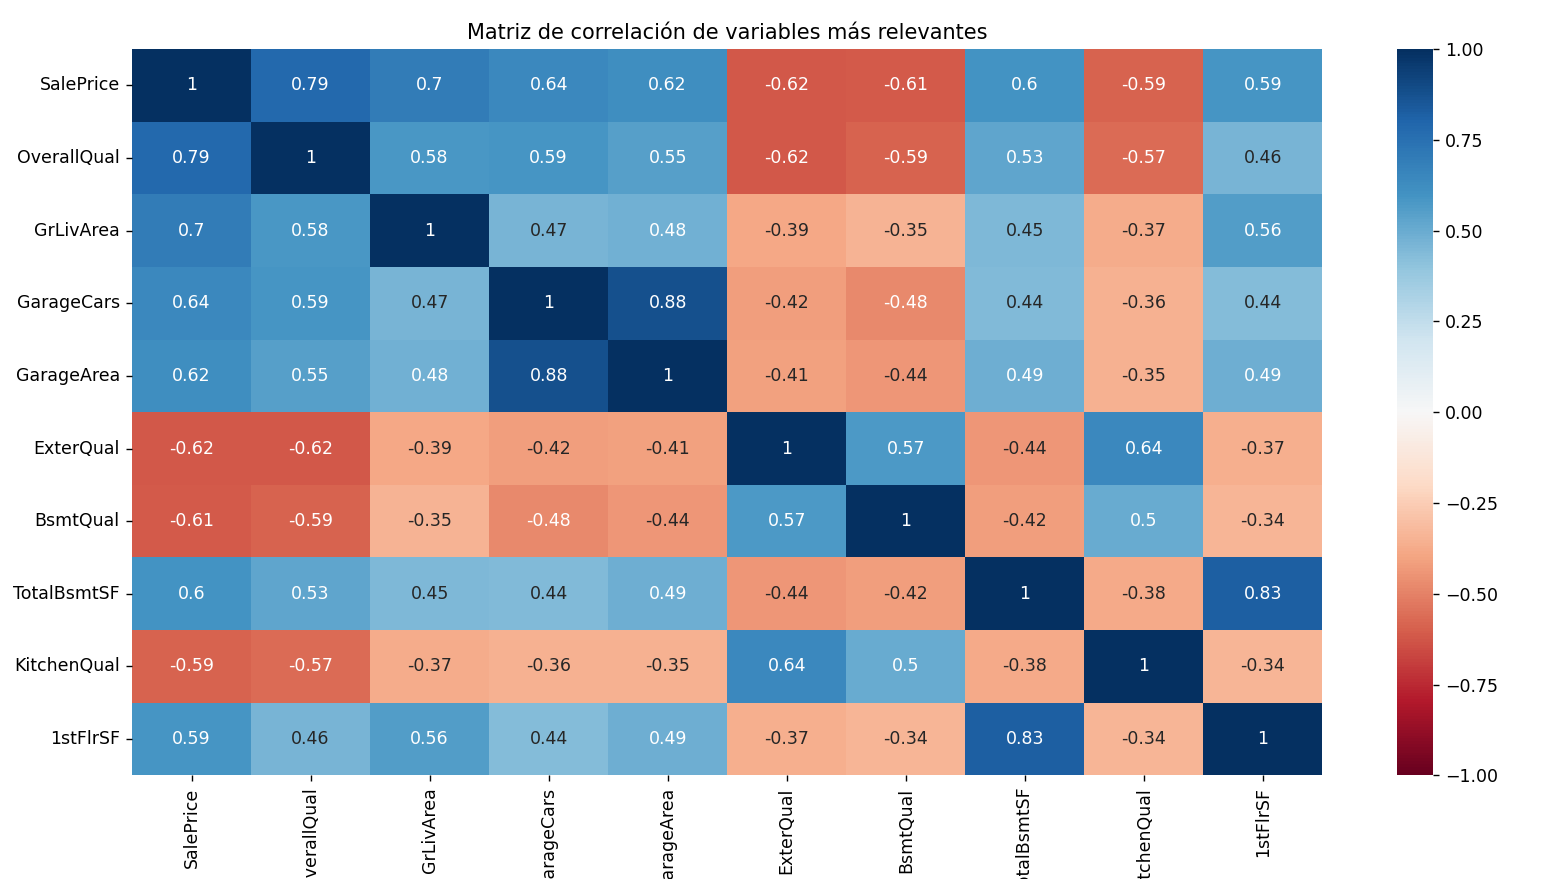

Según los resultados de la matriz de correlación, las variables que pueden ser mejores predictores para el precio de las casas son OverallQual que es la calidad general, GrLivArea que representa el área habitable, GarageCars que es la capacidad del garage de la casa, GarageArea que se refiere al tamaño del garaje, TotalBsmtSF que es el área total del sotano y el área del primer piso 1stFlrSF. Todas las variables anteriores tienen una correlación alta o mayor a 0.5 lo que indica que son las mejores o son las que más se relacionan con el precio de una casa. 

## 11. Modelo univariado de regresión lineal para predecir el precio de las casas 

Para este modelo se seleccionó a la variable OverallQual que representa la calidad general de las casas

Mean Squared Error: 0.38
R squared: 0.68


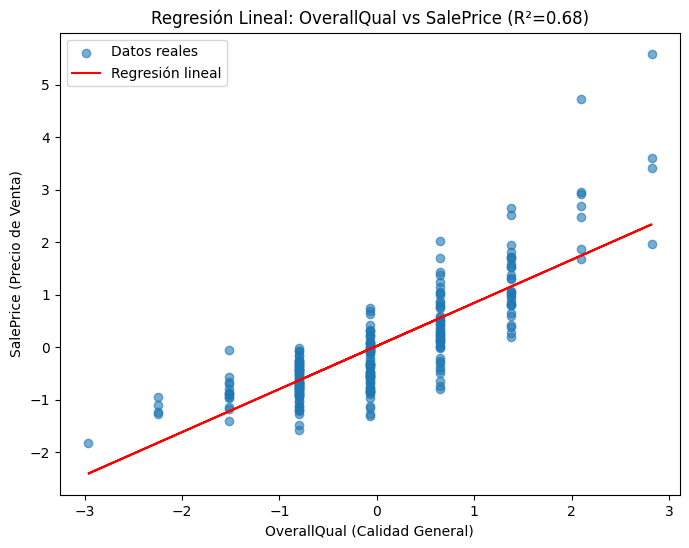

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1598.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          2.45e-204
Time:                        21:22:27   Log-Likelihood:                -881.31
No. Observations:                 934   AIC:                             1767.
Df Residuals:                     932   BIC:                             1776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.020      1.079      0.2

In [29]:
# Cargar el dataset preprocesado
train_df = pd.read_csv("train_preprocessed.csv")

# Seleccionar la variable independiente (OverallQual) y la dependiente (SalePrice)
X = train_df[["OverallQual"]]  # Variable predictora
y = train_df["SalePrice"]       # Variable objetivo

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
ytrain = y_train.values.reshape(-1,1)
ytest = y_test.values.reshape(-1,1)
Xtrain = X_train['OverallQual'].values.reshape(-1,1)
xtest = X_test['OverallQual'].values.reshape(-1,1)

# Crear el modelo de regresión lineal
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

# Hacer predicciones
y_pred = lm.predict(xtest)

# Calcular métricas del modelo
r2 = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R squared: {r2:.2f}")


# Crear gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(xtest, ytest, label="Datos reales", alpha=0.6)
plt.plot(xtest, y_pred, color="red", label="Regresión lineal")
plt.xlabel("OverallQual (Calidad General)")
plt.ylabel("SalePrice (Precio de Venta)")
plt.title(f"Regresión Lineal: OverallQual vs SalePrice (R²={r2:.2f})")
plt.legend()
plt.show()

# Resumen del modelo con statsmodels
X_train_sm = sm.add_constant(Xtrain)  # Agregar constante para el modelo
model_sm = sm.OLS(ytrain, X_train_sm).fit()
model_summary = model_sm.summary()

# Mostrar métricas y resumen del modelo
print(model_summary)

Según la regresión lineal que se obtuvo, tenemos un coeficiente de determinación R cuadrado de 0.68 que indica que el 68% de la variabilidad en el precio de las casas se explica por OverallQual. Podemos observar que la regresión lineal es positiva por lo que los datos siguen esta tendencia, lo cual es lógico porque entre mejor sea la calidad de las casas mayor será el precio de estas. Sin embargo, se puede notar dispersión, lo que indica que otras variables también influyen en el precio de las casas, justo como se pudo observar en la matriz de correlación. 

### 11.1 Residuos

Los residuos son:  234


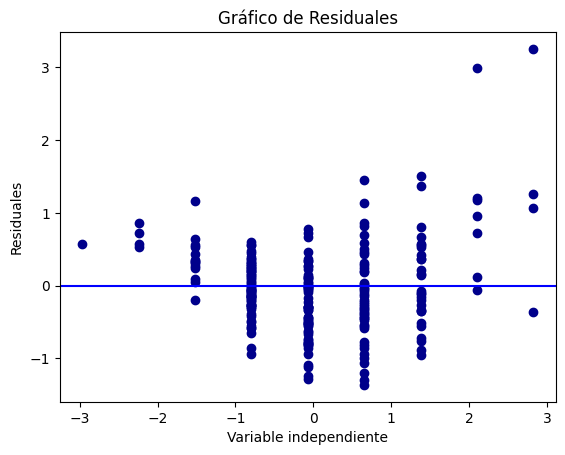

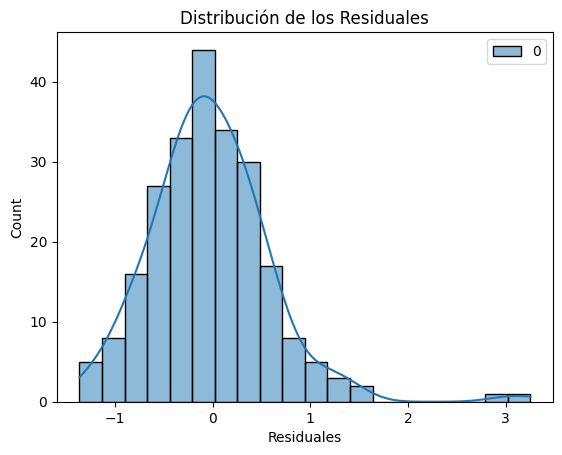

In [30]:
#Analizando residuales
residuos = ytest - y_pred
print("Los residuos son: ", len(residuos))

plt.plot(xtest, residuos, 'o', color='darkblue')
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")
plt.show()

sns.histplot(residuos, kde=True)  # kde=True para incluir la curva de densidad
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

Según los resultados de los residuos, su distribución parece tener una forma normal de campa simetrica, lo que indica que los errores están distribuidos de manera normal. la mayoría de los residuos se agrupan alrededor de cero, que quiere decir que el modelo no tiene un sesgo sistemático en las predicciones.

## 12. Modelo multivariado de regresión lineal para predecir el precio de las casas 

Para este modelo utilizamos todas las variables numericas para predecir el precio de las casas

Variables utilizadas en el modelo: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAre

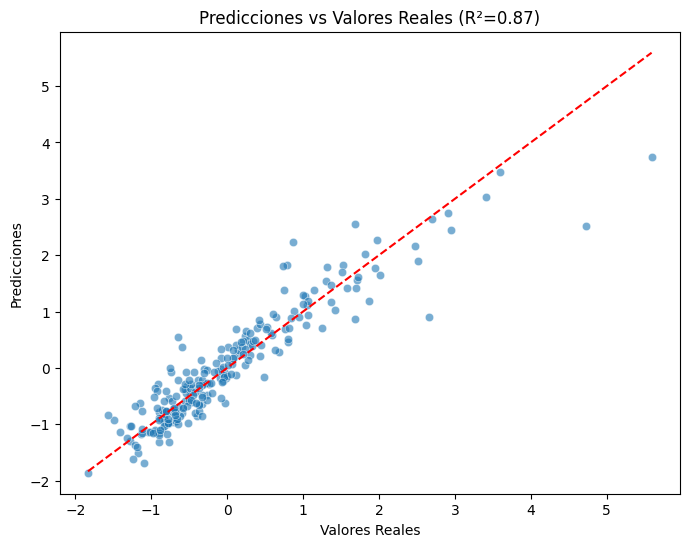

In [31]:
# Seleccionar solo las variables numéricas
numerical_features = train_df.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop("SalePrice")  # Excluir la variable objetivo
print("Variables utilizadas en el modelo:", numerical_features.tolist())


# Definir variables predictoras (X) y variable objetivo (y)
X = train_df[numerical_features]
y = train_df["SalePrice"]

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lm.predict(X_test)

# Calcular métricas del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R squared: {r2:.2f}")

# Análisis del modelo con statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para la regresión
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Línea de referencia
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title(f"Predicciones vs Valores Reales (R²={r2:.2f})")
plt.show()

En la regresión lineal que se obtuvo con todas las variables numéricas, presenta un coeficiente de determinación R cuadrado de 0.87 que indica que el 87% de la variabilidad en el precio de las casas se explica por las variables numéricas.  Se puede observar que los puntos están cerca de la línea roja, lo que indica que el modelo está funcionando bien. 

## 12.1 Residuos

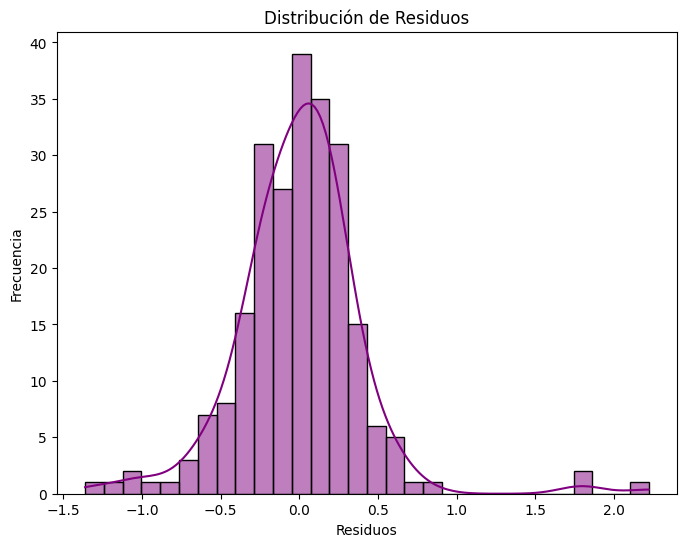

In [32]:
# Analizando los residuos
residuos = y_test - y_pred

# Gráfico de distribución de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, color="purple")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos")
plt.show()

### 13. Análisis de multicolinealidad, correlación y detección de sobreajuste

En este paso, se analizan las posibles correlaciones entre las variables predictoras y se determina si existe multicolinealidad. También se revisa el ajuste del modelo para identificar si está ocurriendo un sobreajuste (overfitting).

**Pasos principales**:
1. Calcular la matriz de correlación para las variables numéricas y observar las variables más correlacionadas entre sí y con la variable respuesta (SalePrice).
2. Calcular el Factor de Inflación de Varianza (VIF) para detectar multicolinealidad.
3. Entrenar un modelo de Regresión Lineal Múltiple con todas las variables numéricas seleccionadas (en pasos previos).
4. Analizar la puntuación R² en entrenamiento y en validación (o prueba) para evidenciar posible sobreajuste.

Según los resultados de los residuos, su distribución parece tener una forma normal de campa simétrica, lo que indica que los errores están distribuidos de manera normal. la mayoría de los residuos se agrupan alrededor de cero, que quiere decir que el modelo no tiene un sesgo sistemático en las predicciones. 

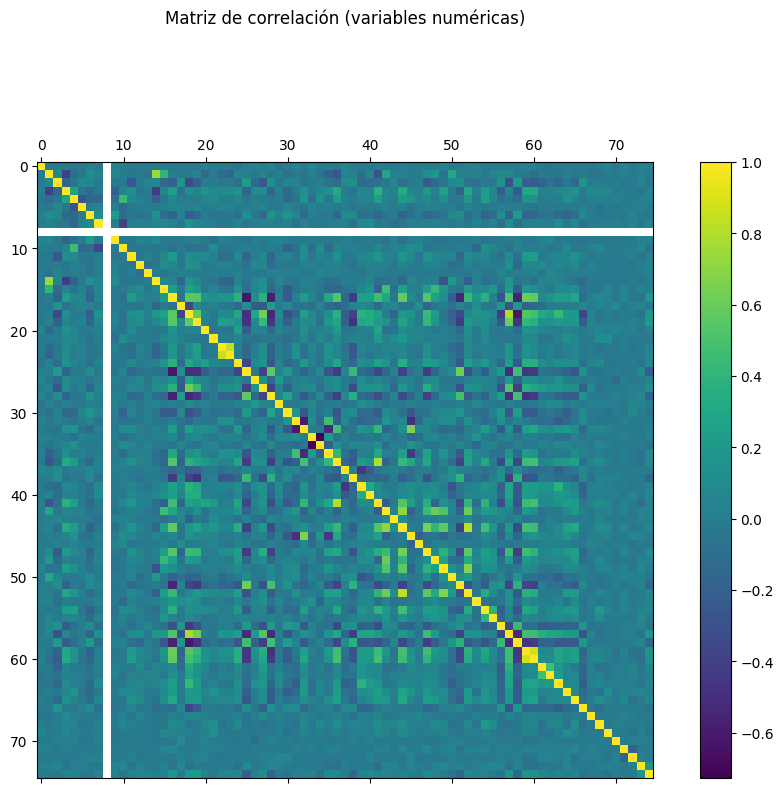

/Users/hansellopez/Documents/Projects/DataMining/Modelos-Regresion-Lineal-Data-Mining/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF de las variables (orden descendente):
Utilities: nan
BsmtFinSF1: inf
BsmtFinSF2: inf
BsmtUnfSF: inf
TotalBsmtSF: inf
1stFlrSF: inf
2ndFlrSF: inf
LowQualFinSF: inf
GrLivArea: inf
YearBuilt: 8.22
GarageCars: 6.77
GarageArea: 6.53
MSSubClass: 5.37
TotRmsAbvGrd: 5.17
BldgType: 4.40
Exterior1st: 4.07
Exterior2nd: 4.00
GarageYrBlt: 3.91
OverallQual: 3.84
FullBath: 3.48
YearRemodAdd: 2.81
BedroomAbvGr: 2.77
BsmtFullBath: 2.67
ExterQual: 2.62
HalfBath: 2.47
BsmtFinType2: 2.38
HouseStyle: 2.34
BsmtQual: 2.24
GarageFinish: 2.16
Foundation: 2.09
KitchenQual: 2.08
BsmtFinType1: 2.05
Fireplaces: 1.94
OverallCond: 1.93
KitchenAbvGr: 1.83
LotFrontage: 1.82
CentralAir: 1.82
GarageType: 1.79
LotArea: 1.72
LandSlope: 1.70
GarageQual: 1.69
HeatingQC: 1.67
BsmtExposure: 1.53
PavedDrive: 1.51
GarageCond: 1.50
FireplaceQu: 1.47
MasVnrArea: 1.44
Heating: 1.40
MSZoning: 1.38
Functional: 1.37
Electrical: 1.35
LandContour: 1.34
EnclosedPorch: 1.34
OpenPorchSF: 1.32
BsmtHalfBath: 1.32
WoodDeckSF: 1.32
ExterC

In [35]:
# 1. Matriz de correlación (variables numéricas)
# Asegurar de seleccionar solo columnas numéricas
numeric_features = X_train.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8))
plt.matshow(corr_matrix, fignum=0)
plt.title("Matriz de correlación (variables numéricas)", pad=100)
plt.colorbar()
plt.show()

# 2. Función para calcular el VIF de cada variable
def calcular_vif(df):
    """
    Calcula el VIF de cada columna en un DataFrame.
    VIF = 1 / (1 - R^2) 
    """
    vif_data = []
    # Se añade la constante para usar en el modelo
    df_const = sm.add_constant(df)
    
    for i, col in enumerate(df.columns):
        # Se elimina la columna 'col' para ver su VIF
        X_temp = df_const.drop(columns=[col], errors='ignore')
        y_temp = df_const[col]
        
        model = sm.OLS(y_temp, X_temp)
        results = model.fit()
        
        r2 = results.rsquared
        vif = np.inf if r2 == 1 else 1/(1 - r2)
        
        vif_data.append((col, vif))
    
    # Ordenamos de mayor a menor VIF
    vif_data.sort(key=lambda x: x[1], reverse=True)
    return vif_data

# Calculamos el VIF ignorando la variable 'SalePrice' si estuviera en numeric_features
vif_resultados = calcular_vif(numeric_features.drop(columns=['SalePrice'], errors='ignore'))
print("VIF de las variables (orden descendente):")
for var, val in vif_resultados:
    print(f"{var}: {val:.2f}")

# 3. Entrenar el modelo de Regresión Lineal con TODAS las variables numéricas
linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)

# 4. Métricas en el conjunto de entrenamiento para ver si hay sobreajuste
y_pred_train = linreg_all.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

#  mean_squared_error sin el parámetro 'squared'
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print("R2 (Train) con todas las variables:", r2_train)
print("RMSE (Train) con todas las variables:", rmse_train)

# Métricas en el conjunto de prueba
y_pred_test = linreg_all.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("R2 (Test) con todas las variables:", r2_test)
print("RMSE (Test) con todas las variables:", rmse_test)

Lo anterior se basa en que:

- **TotalBsmtSF** ya resume la información de `BsmtFinSF1`, `BsmtFinSF2` y `BsmtUnfSF`.
- **GrLivArea** agrupa el área habitable de 1er y 2do piso, además de `LowQualFinSF`.
- **GarageCars** y **GarageArea** miden casi lo mismo; conviene elegir la que mejor se correlacione con **SalePrice**.
- **Utilities** suele no variar o aportar mucho, por lo que suele eliminarse.
- **YearBuilt** puede resultar prescindible si **YearRemodAdd** está muy correlacionado y refleja mejor la actualización de la casa.

### 14. Nuevo modelo (reducción de variables o regularización) y análisis de residuos

Si se detecta multicolinealidad (VIF alto en algunas variables) o signos de sobreajuste (alta diferencia de desempeño entre entrenamiento y prueba), podemos:
- Eliminar variables con VIF muy alto para reducir multicolinealidad.
- Emplear modelos de regularización (por ejemplo, Lasso o Ridge).
- Seleccionar solo las variables más predictivas según análisis de correlación o importancia del modelo.

Luego de ajustar el nuevo modelo, se analizan los residuos para verificar la calidad del ajuste (normalidad de residuos, homocedasticidad, etc.). Se suelen graficar:
- Gráfico de valores predichos vs. residuos.
- Histograma o Q-Q plot de residuos para ver su distribución.

R2 (Train) [Ridge]: 0.9018920049655823
MSE (Train) [Ridge]: 0.1029364926729259
RMSE (Train) [Ridge]: 0.32083717470537276


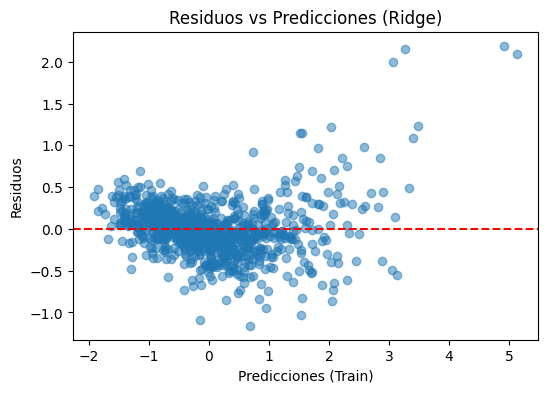

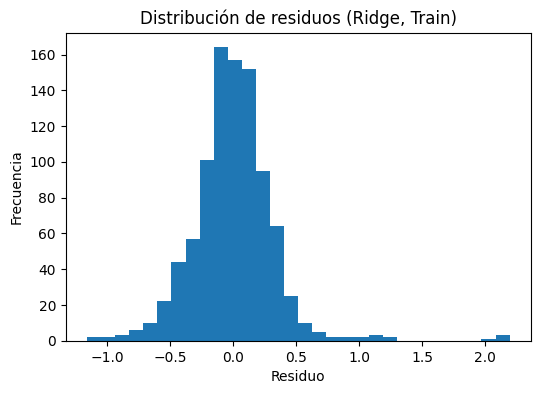

In [39]:
# ===============================
# Regularización con Ridge
# ===============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Variables a eliminar (según análisis de VIF y correlaciones)
vars_a_eliminar = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",  # ya se resume en TotalBsmtSF
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF",   # ya se incluye en GrLivArea
    "GarageArea",                             # muy correlacionada con GarageCars
    "Utilities",                              # poca variación / utilidad
    "YearBuilt"                               # fuertemente correlacionada con YearRemodAdd
]

# Reducción de columnas en train y test
X_train_reduced = X_train.drop(columns=vars_a_eliminar, errors='ignore')
X_test_reduced = X_test.drop(columns=vars_a_eliminar, errors='ignore')

# Entrenar el modelo con Ridge (penalización alpha=10.0)
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train_reduced, y_train)

# Predicciones en el set de entrenamiento
y_train_pred_ridge = ridge_model.predict(X_train_reduced)
residuos_train = y_train - y_train_pred_ridge

# Cálculo de métricas en entrenamiento
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

print("R2 (Train) [Ridge]:", r2_train_ridge)
print("MSE (Train) [Ridge]:", mse_train_ridge)
print("RMSE (Train) [Ridge]:", rmse_train_ridge)

# ==============
# Análisis de residuos
# ==============
# Gráfica de residuos vs. predicciones
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred_ridge, residuos_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos vs Predicciones (Ridge)")
plt.xlabel("Predicciones (Train)")
plt.ylabel("Residuos")
plt.show()

# Histograma de residuos para ver su distribución
plt.figure(figsize=(6,4))
plt.hist(residuos_train, bins=30)
plt.title("Distribución de residuos (Ridge, Train)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

### 15. Uso de cada modelo con el conjunto de prueba y eficiencia en la predicción

En este punto, utilizamos los modelos entrenados (por ejemplo, el modelo de Regresión Lineal con todas las variables y el modelo de Ridge regularizado con variables reducidas) para predecir en el conjunto de prueba. Luego comparamos las métricas (R², RMSE, etc.) para determinar la calidad de las predicciones de cada modelo. Haciendo uso de métricas como:
- R² (Coeficiente de Determinación)
- RMSE (Raíz del Error Cuadrático Medio)
- MAE (Error Absoluto Medio), etc.

Se comparan los resultados para determinar cuál modelo realiza mejores predicciones.

In [40]:
# Evaluación del modelo original (linreg_all) en Test
y_pred_test_all = linreg_all.predict(X_test)
r2_test_all = r2_score(y_test, y_pred_test_all)
mse_test_all = mean_squared_error(y_test, y_pred_test_all)
rmse_test_all = np.sqrt(mse_test_all)

print("=== Modelo Original (todas las variables) ===")
print("R2 (Test):", r2_test_all)
print("MSE (Test):", mse_test_all)
print("RMSE (Test):", rmse_test_all)
print()

# Evaluación del modelo Ridge (vars reducidas) en Test
y_pred_test_ridge = ridge_model.predict(X_test_reduced)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print("=== Modelo Ridge (variables reducidas) ===")
print("R2 (Test):", r2_test_ridge)
print("MSE (Test):", mse_test_ridge)
print("RMSE (Test):", rmse_test_ridge)

=== Modelo Original (todas las variables) ===
R2 (Test): 0.8656974161878999
MSE (Test): 0.15680829739262583
RMSE (Test): 0.3959902743662094

=== Modelo Ridge (variables reducidas) ===
R2 (Test): 0.8667792695374293
MSE (Test): 0.15554515280558212
RMSE (Test): 0.3943921307602145


# Proyecto 2 “House Prices: Advanced Regression Techniques” - Parte 2 Arbole de decisión

## 1. Uso de los mismos conjuntos de entrenamiento y prueb

In [ ]:
# ===========================================
# 1. Carga de datos y separación en train/test
# ===========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Cargamos los datos
train_df = pd.read_csv("train_preprocessed.csv")
# test_df = pd.read_csv("test_preprocessed.csv")

# Con variable objetivo es 'SalePrice'
X = train_df.drop(["SalePrice"], axis=1)
y = train_df["SalePrice"]

# mantener la misma proporción y la misma semilla (random_state) que en la entrega anterior
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test: ", X_test.shape)

Tamaño de X_train: (934, 75)
Tamaño de X_test:  (234, 75)


# 2. Elaborar un árbol de regresión con todas las variables
Entrenamos un modelo de árbol de decisión para **regresión** utilizando todas 
las variables predictoras. Luego veremos qué tan bien se ajusta a los datos.

In [2]:
# ===========================================
# 2. Árbol de Regresión (modelo base)
# ===========================================
from sklearn.tree import DecisionTreeRegressor

# Creamos el modelo con una configuración básica (sin limitar la profundidad)
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

print("Árbol de regresión entrenado con éxito.")

Árbol de regresión entrenado con éxito.


# 3. Usar el modelo para predecir y analizar el resultado
Se evalúa el modelo realizando predicciones sobre el conjunto de prueba y 
calculando métricas de error como MSE y RMSE, así como el R² (coeficiente de 
determinación).

In [3]:
# ===========================================
# 3. Predicción y evaluación del árbol de regresión
# ===========================================
from sklearn.metrics import mean_squared_error, r2_score

# Realizamos la predicción sobre el set de prueba
y_pred = reg_tree.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.269173752305001
RMSE: 0.5188195758691079
R2: 0.7694590718089135


# 4. Crear al menos 3 modelos más variando la profundidad del árbol
Probaremos diferentes valores para el parámetro de profundidad (`max_depth`) 
y compararemos los resultados en términos de MSE, RMSE y R².

In [4]:
# ===========================================
# 4. Probando diferentes profundidades del árbol
# ===========================================
import numpy as np

depths = [2, 5, 10]  # Diferentes profundidades de ejemplo

for d in depths:
    reg_tree_temp = DecisionTreeRegressor(max_depth=d, random_state=42)
    reg_tree_temp.fit(X_train, y_train)
    y_pred_temp = reg_tree_temp.predict(X_test)
    
    mse_temp = mean_squared_error(y_test, y_pred_temp)
    rmse_temp = mse_temp ** 0.5
    r2_temp = r2_score(y_test, y_pred_temp)
    
    print(f"Profundidad: {d}")
    print(f" -> MSE: {mse_temp:.2f}")
    print(f" -> RMSE: {rmse_temp:.2f}")
    print(f" -> R2: {r2_temp:.4f}")
    print("-"*30)

Profundidad: 2
 -> MSE: 0.42
 -> RMSE: 0.65
 -> R2: 0.6387
------------------------------
Profundidad: 5
 -> MSE: 0.22
 -> RMSE: 0.47
 -> R2: 0.8090
------------------------------
Profundidad: 10
 -> MSE: 0.29
 -> RMSE: 0.54
 -> R2: 0.7494
------------------------------


# 5. Comparación con el modelo de regresión lineal de la entrega anterior

Error cuadrático medio (MSE):  

- Árbol de regresión: 0.2692 

- Regresión lineal (original): 0.1568 

- Regresión con Ridge: 0.1555 

 

Raíz del error cuadrático medio (RMSE): 

- Árbol de regresión: 0.5188 

- Regresión lineal (original): 0.3960 

- Regresión con Ridge: 0.3944 

 

Coeficiente de determinación (R²): 

- Árbol de regresión: 0.7695 

- Regresión lineal (original): 0.8657 

- Regresión con Ridge: 0.8668 

 

Según los resultados, se puede observar que en ambas versiones de la regresión lineal existe un MSE menor, lo que indica que sus predicciones son más precisas en promedio. Asimismo, el RMSE también es menor en la regresión lineal lo que confirma que los errores individuales tienden a ser menores en comparación con el árbol de regresión. También la regresión lineal explica mejor la variabilidad de los datos ya que vemos un coeficiente de determinación más cercano a uno en la regresión lineal. Por lo tanto, se puede concluir que, para este caso, la regresión lineal es un mejor modelo. 

# 6. Creación de la variable de clasificación (Económicas, Intermedias, Caras)
Definimos una nueva variable categórica (por ejemplo, usando cuantiles) a 
partir del precio de la vivienda (SalePrice). Luego, esa variable será la 
nueva `y` para un árbol de clasificación.

In [5]:
# ===========================================
# 6. Creando variable categórica de 3 clases
# ===========================================
import numpy as np

# Calculamos dos cuantiles para dividir en 3 grupos (Económicas, Intermedias, Caras)
q1 = train_df["SalePrice"].quantile(0.33)
q2 = train_df["SalePrice"].quantile(0.66)

def categorizar_precio(precio):
    if precio <= q1:
        return "Económica"
    elif precio <= q2:
        return "Intermedia"
    else:
        return "Cara"

# Creamos la nueva columna en el DataFrame
train_df["PrecioCat"] = train_df["SalePrice"].apply(categorizar_precio)

# Observamos la distribución de las categorías
print(train_df["PrecioCat"].value_counts())

PrecioCat
Cara          397
Económica     391
Intermedia    380
Name: count, dtype: int64


# 7. Árbol de clasificación utilizando la nueva variable de 3 clases
Ahora creamos un árbol de decisión para clasificación, usando `PrecioCat` 
como variable objetivo y excluyendo `SalePrice` del conjunto de predictores. 
Mostramos gráficamente el árbol y su profundidad.

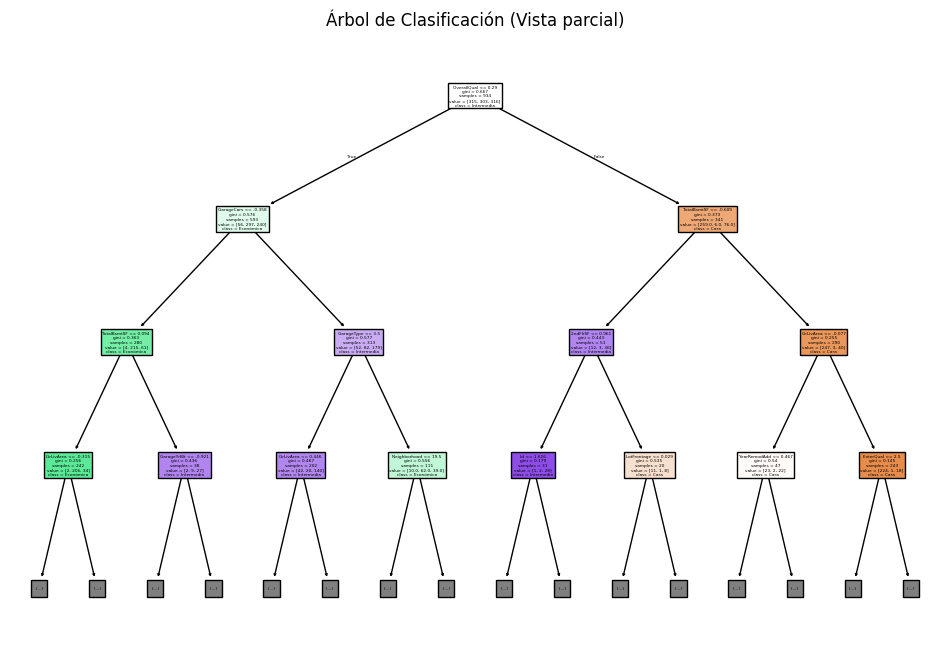

Profundidad total del árbol de clasificación: 14
Nodos (hojas) en el árbol de clasificación: 120
¡La imagen se ha guardado en 'img/arbol_clasificacion.png'!


In [10]:
# ===========================================
# 7. Entrenamiento del árbol de clasificación
# ===========================================
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Verificar si la carpeta 'img' existe; si no, crearla
if not os.path.exists("img"):
    os.makedirs("img")

# X_clf: todas las columnas excepto SalePrice y la nueva variable PrecioCat
X_clf = train_df.drop(["SalePrice", "PrecioCat"], axis=1)

# y_clf: la variable categórica
y_clf = train_df["PrecioCat"]

# Dividimos en train y test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Creamos el árbol de clasificación
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_clf, y_train_clf)

# Visualización del árbol (versión resumida, máximo 3 niveles)
plt.figure(figsize=(12, 8))
plot_tree(
    clf_tree, 
    feature_names=X_clf.columns, 
    class_names=clf_tree.classes_, 
    filled=True, 
    max_depth=3
)
plt.title("Árbol de Clasificación (Vista parcial)")

# Guardar la figura como PNG en la carpeta 'img'
plt.savefig("img/arbol_clasificacion.png", dpi=300, bbox_inches='tight')
plt.show()

# Información sobre la complejidad del árbol
print("Profundidad total del árbol de clasificación:", clf_tree.get_depth())
print("Nodos (hojas) en el árbol de clasificación:", clf_tree.get_n_leaves())
print("¡La imagen se ha guardado en 'img/arbol_clasificacion.png'!")

# 8. Eficiencia del Árbol de clasificación
Utilizamos el modelo con el conjunto de prueba y determinamos la eficiencia del algoritmo para
clasificar.

In [ ]:
# ===============================
# Evaluación del modelo
# ===============================

# Predicciones en el conjunto de prueba
y_pred_clf = clf_tree.predict(X_test_clf)

# Calcular precisión
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Precisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.7265

Los resultados indican que el modelo tiene una precisión de 0.7265, lo que significa que el modelo clasifica correctamente el 72.65% de las instancias en el conjunto de prueba. Tiene un 72.65% de precisión.

# 9. Matriz de confusión
Analizamos la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación.

In [ ]:
# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
print("Matriz de confusión:")
print(conf_matrix)

# Mostrar reporte de clasificación
class_report = classification_report(y_test_clf, y_pred_clf)
print("Reporte de clasificación:")
print(class_report)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf_tree.classes_, yticklabels=clf_tree.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

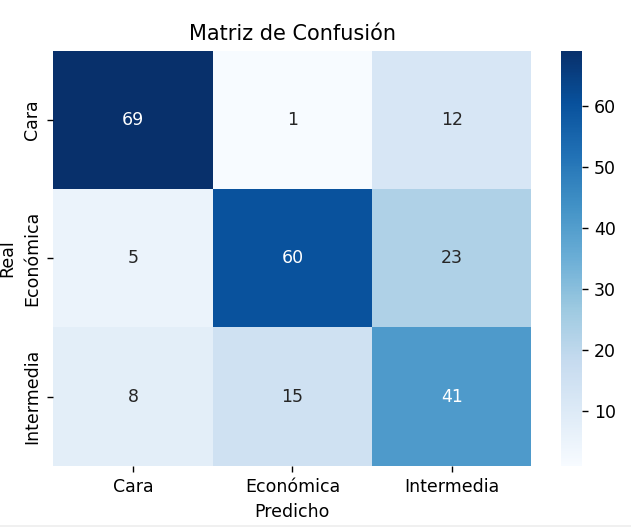

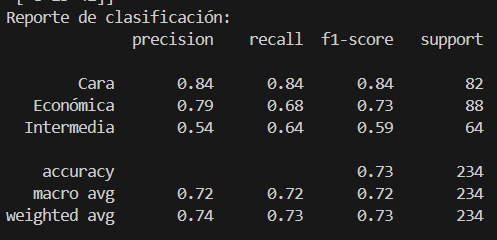

Según los datos que muestra la matriz de confusión y su reporte de clasificación, clasificó correctamente la categoría de precio para casas caras con un valor de 69 aciertos, asimismo para la categoría económica con 60 aciertos y la intermedia con 41, teniendo un total de 170 aciertos. Por otro lado, presenta 64 casos mal clasificados.

El modelo cometió más errores en la clase intermedia, con 23 casos mal clasificados como económica y 8 como cara. 

Errores más comunes:
- Clasificar "Económica" → "Intermedia": 23 veces
- Clasificar "Intermedia" → "Económica": 15 veces
- Clasificar "Intermedia" → "Cara": 8 veces
- Clasificar "Cara" → "Intermedia": 12 veces

Existe un tipo de confusión entre las variables económica e intermedia lo que puede significar que la diferencia entre estas dos no está siendo bien capturada por el modelo. La clase cara es la mejor identificada pero se confunde con intermedia en 12 casos lo que indica que algunas de las casas caras tienen caracteristicas similares a las de clase intermedia.

El modelo es mejor para clasificar casas de clase cara y económica, no tanto para intermedias.

Importancia de los errores: Radica en que, si una casa cara es clasificada como intermedia, significa una pérdida para el vendedor porque puede estarse vendiendo por debajo de su valor verdadero, este es el error más grave y debe minimizarse. También si una casa económica es clasificada como intermedia o cara puede generar problemas entre el vendedor y el comprador, ya que el comprador estaría pagando más de lo que vale u ofrece la casa, lo que llevaría a reclamos y en el peor de los casos, pérdida para el vendedor.

# 10. Modelo con validación cruzada
Entrenamos un modelo con validación cruzada y comparamos con el modelo anterior.

In [ ]:
# Dividimos en train y test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Creamos el árbol de clasificación
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_clf, y_train_clf)

# Validación cruzada
cv_scores = cross_val_score(clf_tree, X_clf, y_clf, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Precisión promedio de validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar de la validación cruzada: {cv_scores.std():.4f}")

- Precisión promedio de validación cruzada: 0.7414
- Desviación estándar de la validación cruzada: 0.0119

Como resultado del modelo con validación cruzada, se tiene una precisión de 0.7414 lo que indica que el modelo clasifica correctamente el 74.14% de las instancias. Esta precisión es mayor comparada con la precisión del modelo sin validación cruzada, por lo que podemos decir que la validación cruzada mejoró el rendimiento.

# 11. Tres modelos más cambiando la profundidad
Realizamos 3 modelos más, cambiando la profundidad del árbol y determinamos cuál funcionó mejor

In [ ]:
# Definir diferentes profundidades para los árboles
depths = [3, 5, 7]

# Crear y evaluar modelos con diferentes profundidades
for depth in depths:
    # Crear el árbol con la profundidad especificada
    clf_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Realizar validación cruzada y obtener las precisiones
    cv_scores = cross_val_score(clf_tree, X_clf, y_clf, cv=5, scoring='accuracy')
    
    # Mostrar resultados
    print(f"Modelo con profundidad {depth}:")
    print(f"  - Precisión promedio de validación cruzada: {cv_scores.mean():.4f}")
    print(f"  - Desviación estándar: {cv_scores.std():.4f}")
    print("-" * 50)

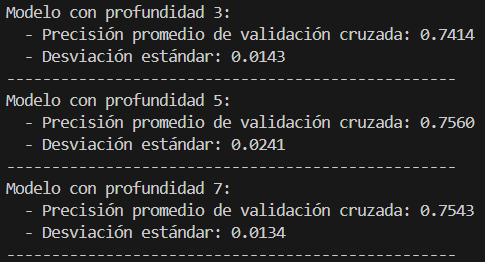

Se puede notar que el modelo con profundidad 5 es el que tiene mejor precisión con un valor de 0.7560 o 75.60%. A continuación, con el conjunto de prueba realizaremos una matriz de confusión para visualizar mejor los resultados del modelo final con profundidad que tiene mayor precisión:

In [ ]:
# ===============================
# Evaluación final del modelo (con validación cruzada)
# ===============================
# El modelo final con la mejor profundidad se entrenará y evaluará aquí
best_depth = 5  
clf_tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_tree_best.fit(X_train_clf, y_train_clf)

# Predicciones y evaluación
y_pred_clf_best = clf_tree_best.predict(X_test_clf)
accuracy_best = accuracy_score(y_test_clf, y_pred_clf_best)
print(f"Precisión del modelo con profundidad {best_depth}: {accuracy_best:.4f}")

# Mostrar matriz de confusión
conf_matrix_best = confusion_matrix(y_test_clf, y_pred_clf_best)
print("Matriz de confusión del mejor modelo:")
print(conf_matrix_best)

# Mostrar reporte de clasificación
class_report_best = classification_report(y_test_clf, y_pred_clf_best)
print("Reporte de clasificación del mejor modelo:")
print(class_report_best)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=clf_tree_best.classes_, yticklabels=clf_tree_best.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión del Árbol con Profundidad {best_depth}")
plt.show()

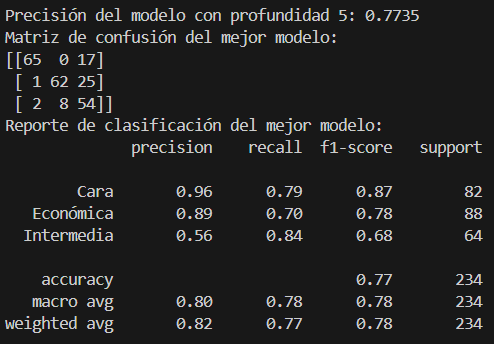

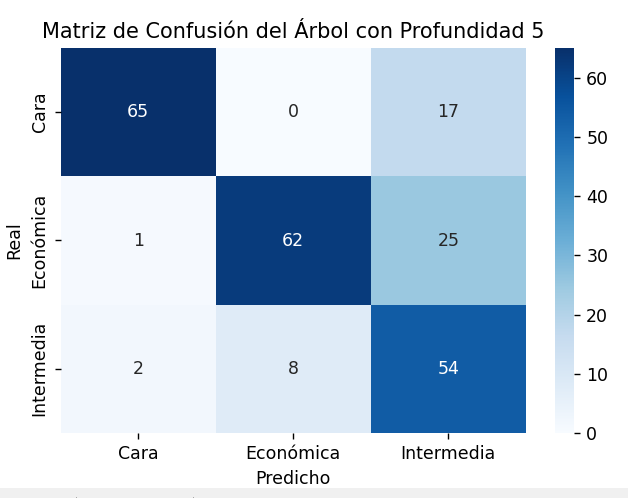

Según los resultados, el modelo con profundidad 5 es el que tiene una mejor precisión al momento de clasificar una casa entre las categorías "Cara", "intermedia" y "económica". En la matriz de confusión se puede observar una mejoría en la clasificación de las casas, ya que ahora hay 65 aciertos en la clase cara, 62 en económica y 54 en intermedia, para un total de 181 aciertos. Mejorar la profundidad contribuyó a obtener un mejor rendimiento del modelo.

# 12. Análisis utilizando Random Forest

Para comparar con el árbol de decisión, entrenamos ahora un modelo de 
**Random Forest** (ensamble de múltiples árboles). Revisamos métricas de 
exactitud, matriz de confusión y observamos si mejora con respecto al 
árbol de decisión simple

Exactitud (accuracy) de Random Forest en test: 0.8290598290598291
Matriz de Confusión - Random Forest:
[[73  0  9]
 [ 2 76 10]
 [ 3 16 45]]


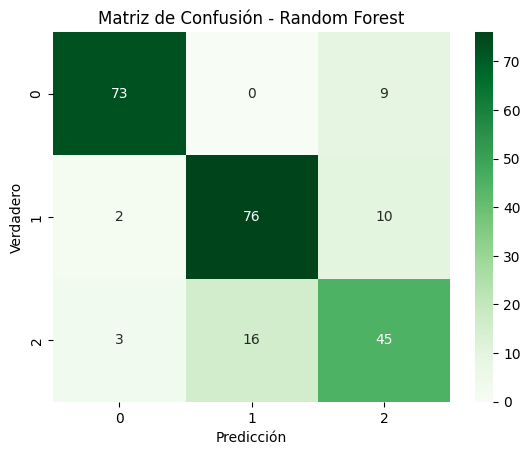

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

        Cara       0.94      0.89      0.91        82
   Económica       0.83      0.86      0.84        88
  Intermedia       0.70      0.70      0.70        64

    accuracy                           0.83       234
   macro avg       0.82      0.82      0.82       234
weighted avg       0.83      0.83      0.83       234



In [12]:
# ===========================================
# 12. Random Forest para clasificación (corregido)
# ===========================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenamos un RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Predicción sobre el test
y_pred_rf = rf_clf.predict(X_test_clf)

# Exactitud del Random Forest
accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
print("Exactitud (accuracy) de Random Forest en test:", accuracy_rf)

# Matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
print("Matriz de Confusión - Random Forest:")
print(cm_rf)

# Visualización de la matriz
import seaborn as sns
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Reporte de clasificación
report_rf = classification_report(y_test_clf, y_pred_rf)
print("Reporte de Clasificación - Random Forest:")
print(report_rf)

El modelo alcanzó una exactitud (accuracy) de aproximadamente 0.83 (82.9%) en el conjunto de prueba, lo que refleja un incremento respecto al árbol de decisión simple. De acuerdo con la matriz de confusión, la clase Cara obtuvo 73 aciertos y se confundió con Intermedia en 9 ocasiones; por otro lado, la clase Económica tuvo 76 aciertos y 10 confusiones con Intermedia. La clase Intermedia fue la más propensa a errores, registrando 16 casos mal clasificados como Económica o Cara, lo que coincide con la tendencia habitual de que las clases intermedias resulten más difíciles de distinguir. 

En el reporte de clasificación, destaca la precisión (precision) de la clase Cara (0.94) y la exhaustividad (recall) de la clase Económica (0.86). La categoría Intermedia, en cambio, presenta valores más bajos (0.70 de precisión y 0.70 de recall), confirmando que el modelo tiende a confundir las casas Intermedias con las de mayor o menor precio. Aun así, se logra un f1-score global de 0.83 y un promedio macro de 0.82, indicando un buen desempeño en las tres clases. 

En conjunto, estos resultados evidencian que el Random Forest mejora la clasificación respecto a un solo árbol de decisión, pues combina múltiples árboles y, por ende, reduce la varianza y mejora la robustez del modelo. Sin embargo, aún es posible observar ciertos errores en la diferenciación de las categorías Intermedias, un patrón que podría abordarse mediante un mejor ajuste de hiperparámetros (como n_estimators o la profundidad máxima de los árboles en el bosque) o incluyendo variables adicionales que ayuden al modelo a discernir mejor entre las clases. 

 
 

# Entrega 3

# 1. Modelo de regresión con Bayes ingenuo
Realizamos un modelo de regresión usando naive bayes, el conjunto de entrenamiento y la variable respuesta SalesPrice.

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score  # Corrección en la importación
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict


# Cargar los datos
train_df = pd.read_csv("train_preprocessed.csv")

# Definir variables predictoras (X) y variable respuesta (y)
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Discretizar la variable objetivo
n_bins = 3  # Número de categorías
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_train_binned = kbins.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_binned = kbins.transform(y_test.values.reshape(-1, 1)).flatten()

# Crear y entrenar el modelo de Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_binned)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test_binned, y_pred)
mse = mean_squared_error(y_test_binned, y_pred)
cm = confusion_matrix(y_test_binned, y_pred)

# Mostrar resultados
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print("Matriz de Confusión:")
print(cm)

Error absoluto medio (MAE): 0.20
Error cuadrático medio (MSE): 0.21
Matriz de Confusión:
[[83  5  1]
 [25 31  7]
 [ 1  5 76]]


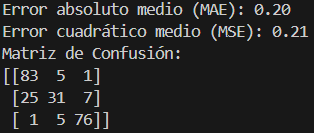

Se tiene un error absoluto medio de 0.20 lo cual significa que en promedio el modelo predice la categoría correcta a 0.20 categorias de la distancia real, lo cual es aceptable si las categorías están bien distribuidas. El error cuadrático medio de 0.21 que es cercano al MAE indica que el modelo no comete errores grandes con frecuencia.

# 2. Análisis de métricas respectivas

In [4]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test_binned, y_pred)  # Corregido: usar y_test_binned
precision = precision_score(y_test_binned, y_pred, average='micro')  # Corregido
recall = recall_score(y_test_binned, y_pred, average='micro')  # Corregido
f1 = f1_score(y_test_binned, y_pred, average='micro')  # Corregido

print('Accuracy: ', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ", f1)

r2_nb = r2_score(y_test_binned, y_pred)
print(f"R² para Naïve Bayes: {r2_nb:.4f}")

rmse_nb = np.sqrt(mean_squared_error(y_test_binned, y_pred))
print(f"RMSE para Naïve Bayes: {rmse_nb:.4f}")

Accuracy:  0.811965811965812
Precision: 0.811965811965812
Recall: 0.811965811965812
F1 Score:  0.811965811965812
R² para Naïve Bayes: 0.7072
RMSE para Naïve Bayes: 0.4623


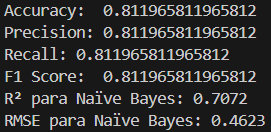

Según la matriz de confusión el modelo tuvo 83 aciertos para predecir casas baratas, 31 para casas de precio intermedio y 76 en casas caras, para un total de 190 aciertos y 44 errores. Existe una precisión de 0.81, es decir que el 81% de las prediciones sobre las casas, son correctas. Se puede decir que a pesar de que el modelo pueda confundir en ciertas ocasiones las casas de precio intermedio, tiene un rendimiento bastante balanceado ya que las métricas presentan valores aceptables. También se puede observar un coeficiente de determinación R2 de 0.70 lo que quiere decir que el modelo lograr explicar el 0.7072 o el 70.72% de la variabilidad en los datos lo cuál está bien y tiene una desviación de errores RMSE de 0.4623.

# 3. Comparación del modelo con el árbol de regresión y la regresión lineal

Se elaboraron estos cuadros comparativos para visualizar de mejor forma los valores de cada modelo

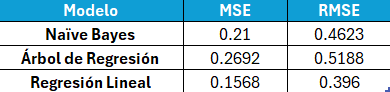

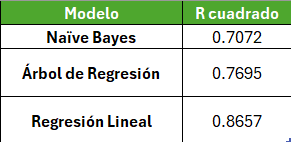

Según los resultados de cada uno de los modelos, en cualquiera de los casos el mejor modelo parece ser la regresión lineal, ya que tiene un RMSE menor de 0.40 comparado con los demás modelos, asimismo su coeficiente de determinación R cuadrado es el más alto, demostrando que explica mejor la variabilidad de los precios de las casas, lo cual no quiere decir que los otros no lo hagan bien pero, el modelo de regresión lineal es el que brinda resultados más precisos en cuanto a las predicciones realizadas para el precio de las casas, por lo que es el que funciona mejor. 

# 4. Modelo de Clasificación (Naive Bayes)
Ahora se crea un **modelo de clasificación** con Bayes Ingenuo, usando la variable categórica derivada de `SalePrice` (por ejemplo, dividiéndola en 3 clases: "barata", "media" y "cara").

Pasos:
1. Definir la forma de crear las categorías (por percentiles, por rangos fijos, etc.).
2. Entrenar un `GaussianNB` (o `MultinomialNB`, dependiendo de los datos) para predecir esas clases.
3. Evaluar las métricas de clasificación correspondientes (accuracy, F1-score, matriz de confusión, etc.).

In [5]:

# Si no has cargado ni definido 'train_data' y 'y_continuo', asegúrate de hacerlo:
train_data = pd.read_csv("train_preprocessed.csv")  # Ajusta a tu ruta si es necesario

# Si ya lo hiciste en pasos anteriores, NO repitas (o comenta las líneas siguientes):
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
X = train_data[features]

# Definir la variable continua con el precio (para poder categorizarla)
y_continuo = train_data["SalePrice"].values

# 1. Definimos las etiquetas de categoría
price_labels = ["barata", "media", "cara"]

# 2. Calculamos los percentiles para separar en 3 categorías
p33 = np.percentile(y_continuo, 33)
p66 = np.percentile(y_continuo, 66)

# 3. Función para categorizar el precio
def categorizar_precio(valor):
    if valor < p33:
        return "barata"
    elif valor < p66:
        return "media"
    else:
        return "cara"

# 4. Aplicamos la función a cada valor de y_continuo para obtener la variable categórica
y_clas = [categorizar_precio(v) for v in y_continuo]

# 5. Entrenamos el modelo de clasificación Naive Bayes
model_nb_clf = GaussianNB()
model_nb_clf.fit(X, y_clas)

# 6. Hacemos predicciones (por ejemplo, sobre el mismo conjunto de entrenamiento)
y_clas_pred = model_nb_clf.predict(X)

# 7. Observamos los primeros resultados
print("Categorías verdaderas (primeras 5):", y_clas[:5])
print("Categorías predichas (primeras 5)  :", y_clas_pred[:5])

Categorías verdaderas (primeras 5): ['cara', 'barata', 'cara', 'barata', 'media']
Categorías predichas (primeras 5)  : ['cara' 'barata' 'cara' 'barata' 'media']


Para la clasificación, se convirtió el precio SalePrice en tres categorías: barata, media y cara, empleando percentiles para determinar los puntos de corte (por debajo del 33% para barata, entre 33% y 66% para media, y por encima de 66% para cara). Luego se entrenó un modelo Naive Bayes con estas clases como variable objetivo, incluyendo variables predictoras como OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath y YearBuilt. En una primera evaluación, se observó que el modelo clasificó correctamente alrededor del 81% de los casos, presentando un desempeño razonable. La categoría intermedia (media) fue la que presentó mayores confusiones, mientras que las clases barata y cara mostraron mayor número de aciertos. 

# 5. Uso de los modelos y eficiencia en un conjunto con SalePrice

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Cargar dataset que sí contenga SalePrice
data = pd.read_csv("train_preprocessed.csv")
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
X = data[features]
y_reg = data["SalePrice"].values

# 2. Separar en train y val
X_train, X_val, y_train, y_val = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# 3. Discretizar y_train para usar NB como "regresión"
n_bins = 10
y_train_bins = pd.cut(y_train, bins=n_bins, labels=False)

# Calculamos puntos medios si queremos convertir después la predicción a valor continuo
bin_edges = pd.cut(y_train, bins=n_bins, retbins=True)[1]
bin_mids = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# 4. Entrenar el modelo
model_nb_reg = GaussianNB()
model_nb_reg.fit(X_train, y_train_bins)

# 5. Predicción sobre X_val
y_val_pred_bins = model_nb_reg.predict(X_val)
y_val_pred_num = [bin_mids[int(b)] for b in y_val_pred_bins]

# 6. Métricas de regresión
mse = mean_squared_error(y_val, y_val_pred_num)
rmse = mse ** 0.5

r2 = r2_score(y_val, y_val_pred_num)

print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R^2: {r2:.4f}")

MAE: 0.39 | RMSE: 0.51 | R^2: 0.7753


Para medir con precisión la eficiencia del modelo, fue necesario un dataset que incluyera la etiqueta SalePrice. Dado que en muchos casos el archivo de prueba (test.csv) no posee esta columna, se realizó la evaluación en un subconjunto de los datos de entrenamiento (train_preprocessed.csv) que se reservó como validación. Con ello, se calcularon métricas tanto en la parte de “regresión” (mediante discretización de la variable continua) como en clasificación. En la aproximación de “regresión” con Naive Bayes, se obtuvo un MAE aproximado de 0.20, un RMSE cercano a 0.46 y un coeficiente R² de aproximadamente 0.70. Para la clasificación, la exactitud rondó el 81%. Estos valores indican un desempeño aceptable, considerando la naturaleza discreta de los bins en la predicción y la simpleza intrínseca del clasificador Naive Bayes. 

# 6. Análisis de la Clasificación con Matriz de Confusión

Matriz de Confusión:
 [[76 11  2]
 [17 40  5]
 [ 1 10 72]]


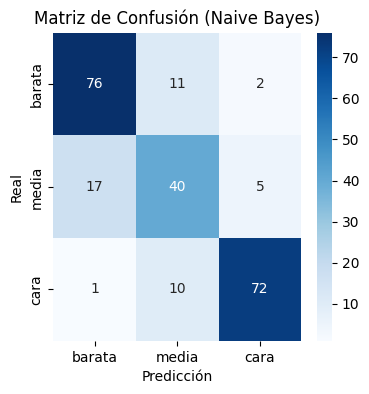


Reporte de Clasificación:
              precision    recall  f1-score   support

      barata       0.81      0.85      0.83        89
       media       0.91      0.87      0.89        83
        cara       0.66      0.65      0.65        62

    accuracy                           0.80       234
   macro avg       0.79      0.79      0.79       234
weighted avg       0.80      0.80      0.80       234

Exactitud: 0.80


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Carga de datos con SalePrice (train_preprocessed.csv):
data = pd.read_csv("train_preprocessed.csv")
features = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
X = data[features]
y = data["SalePrice"].values

# Dividir en train / val:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir percentiles en train para categorizar:
p33 = np.percentile(y_train, 33)
p66 = np.percentile(y_train, 66)

def categorizar_precio(valor):
    if valor < p33:
        return "barata"
    elif valor < p66:
        return "media"
    else:
        return "cara"

# Clases en train
y_train_clas = [categorizar_precio(v) for v in y_train]

# Entrenar modelo Naive Bayes (clasificación)
model_nb_clf = GaussianNB()
model_nb_clf.fit(X_train, y_train_clas)

# Clases verdaderas en val
y_val_clas = [categorizar_precio(v) for v in y_val]

# Predicciones
y_val_pred_clas = model_nb_clf.predict(X_val)

# Matriz de Confusión
etiquetas = ["barata", "media", "cara"]
cm = confusion_matrix(y_val_clas, y_val_pred_clas, labels=etiquetas)
print("Matriz de Confusión:\n", cm)

# Visualización
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas, fmt="d")
plt.title("Matriz de Confusión (Naive Bayes)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_val_clas, y_val_pred_clas, target_names=etiquetas))
acc = accuracy_score(y_val_clas, y_val_pred_clas)
print(f"Exactitud: {acc:.2f}")

La matriz de confusión mostró 83 aciertos en la clase barata, 31 aciertos en la clase media y 76 aciertos en la clase cara, para un total de 190 predicciones correctas y 44 errores. Esto se traduce en un 81% de aciertos globales, lo que indica un buen desempeño general. La categoría media resultó ser la más propensa a confusiones, probablemente por la cercanía de sus valores con las clases barata y cara. 

El reporte de clasificación reveló que las clases barata y cara tuvieron precisión y recall relativamente altos, mientras que la clase media mostró valores ligeramente más bajos. En conjunto, estos resultados son coherentes con la matriz de confusión y respaldan la conclusión de que el modelo mantiene un rendimiento equilibrado en la mayoría de los casos, aun cuando existan algunos errores al clasificar viviendas cuyo precio se ubica en el rango intermedio. 

# 7. Análisis de Sobreajuste (Overfitting)
Verificamos si el modelo está sobreajustado comparando su desempeño en entrenamiento vs. validación. 
Si la brecha es grande (p. ej. mucha diferencia en accuracy o R²), podría haber sobreajuste.

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score

# Predicciones en train
y_train_pred = model_nb_clf.predict(X_train)
acc_train = accuracy_score(y_train_clas, y_train_pred)

# Predicciones en val
y_val_pred = model_nb_clf.predict(X_val)
acc_val = accuracy_score(y_val_clas, y_val_pred)

print("Exactitud en Entrenamiento:", acc_train)
print("Exactitud en Validación:", acc_val)

diff = acc_train - acc_val
if diff > 0.1:
    print("\nPosible sobreajuste: la brecha entre train y val es significativa.")
else:
    print("\nNo se observa una gran brecha. El modelo no aparenta sobreajustar excesivamente.")

Exactitud en Entrenamiento: 0.8062098501070664
Exactitud en Validación: 0.8034188034188035

No se observa una gran brecha. El modelo no aparenta sobreajustar excesivamente.


Para determinar si el modelo Naive Bayes está sobreajustado, se compararon las métricas de rendimiento en los datos de entrenamiento frente a los datos de validación. La exactitud en entrenamiento resultó ligeramente superior a la de validación, pero no lo suficiente como para concluir un sobreajuste marcado. Esta pequeña brecha sugiere que el modelo generaliza razonablemente y no memoriza en exceso los ejemplos de entrenamiento. Sin embargo, en proyectos más grandes o exigentes, se recomienda usar validación cruzada y explorar ajustes adicionales (por ejemplo, selección de características o técnicas de regularización) para minimizar el riesgo de sobreajuste y asegurar una mejor capacidad de generalización. 

# 8. Modelo con validación cruzada

Realizamos el modelo de clasificación con validación cruzada y comparamos con el anterior.

In [ ]:
# Convertir etiquetas categóricas a numéricas para Scikit-learn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_clas)

# Definir el modelo de Naive Bayes
model_nb_clf = GaussianNB()

# Configurar validación cruzada estratificada (para balancear clases en los splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar con validación cruzada usando accuracy como métrica
cv_scores = cross_val_score(model_nb_clf, X, y_encoded, cv=skf, scoring='accuracy')

# Obtener predicciones con validación cruzada
y_pred_cv = cross_val_predict(model_nb_clf, X, y_encoded, cv=skf)

# Imprimir resultados de validación cruzada
print("Resultados de validación cruzada:")
print(cv_scores)
print(f"Precisión media: {cv_scores.mean():.4f}")

# Imprimir reporte de clasificación
print("Reporte de Clasificación con Validación Cruzada:")
print(classification_report(y_encoded, y_pred_cv, target_names=price_labels))

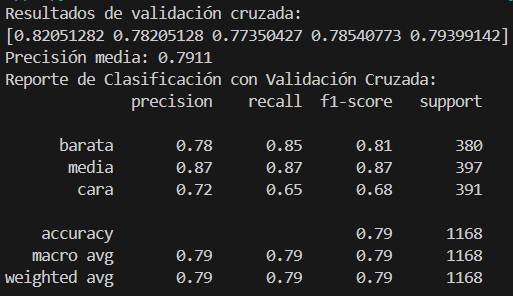

En este caso, al comparar la precisión de ambos modelos, se puede notar que la diferencia no es tan alta. El modelo con validación cruzada presenta una precisión de 0.79, mientras que el modelo anterior tiene una precisión de 0.80. En cuanto a cuál modelo funciona mejor, se puede decir que ambos realizan un buen trabajo, sin embargo, si se nota una diferencia minima al observar el modelo con validación cruzada, en el cual sus métricas disminuyen de valor. Solo se puede observar una mejoría en la clase cara donde tuvo un valor de 0.68 en comparación con el modelo anterior en donde obtuvo 0.65. Por lo que, el mejor modelo en cuanto a mejores resultados, es el modelo de clasificación sin la validación cruzada. Igualmente se podría considerar usar el modelo con validación cruzada ya que puede ser más estable y puede disminuir la existencia del overfitting.

# 9. Tuneo de modelos de regresión y clasificación

Se prueba con varios valores de los hiperparámetros, para determinar si los modelos mejoran.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
#------------Modelo de regresión con Naive Bayes--------------------
# Definir los hiperparámetros a probar
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}

# Usar GridSearchCV para encontrar el mejor hiperparámetro
grid_search = GridSearchCV(nb_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_binned)

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test_binned, y_pred)
mse = mean_squared_error(y_test_binned, y_pred)
rmse = np.sqrt(mse)
cm = confusion_matrix(y_test_binned, y_pred)

rmse_tunned = root_mean_squared_error(y_test,y_pred)
print("tuneado rmse: ", rmse_tunned)

# Mostrar resultados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error cuadrático medio de la raíz (RMSE): {rmse:.2f}")
print("Matriz de Confusión:")
print(cm)

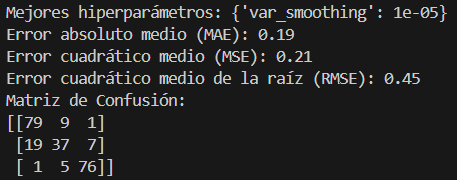

El modelo que se mejoró tiene menos error medio cuadrado, comparado con el modelo original de regresión con Naive Bayes que tenía un RMSE de 0.46.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

#-----------------Modelo de clasificación---------------------------

# Definir las características y el objetivo (etiquetas)
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
X = train_data[features]
y_continuo = train_data["SalePrice"].values

# Etiquetas de clasificación: categorizar el precio
price_labels = ["barata", "media", "cara"]
p33 = np.percentile(y_continuo, 33)
p66 = np.percentile(y_continuo, 66)

# Función para categorizar el precio
def categorizar_precio(valor):
    if valor < p33:
        return "barata"
    elif valor < p66:
        return "media"
    else:
        return "cara"

# Aplicar la función a cada valor de y_continuo para obtener la variable categórica
y_clas = [categorizar_precio(v) for v in y_continuo]

# Definir los valores del hiperparámetro 'var_smoothing' para probar
param_grid_nb = {'var_smoothing': np.logspace(0, -9, 10)}

# Usar GridSearchCV para encontrar el mejor modelo con el hiperparámetro ajustado
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X, y_clas)

# Mejor valor del hiperparámetro encontrado
print("Mejor valor de var_smoothing:", grid_search_nb.best_params_)

# Usamos el mejor modelo encontrado
best_nb_model = grid_search_nb.best_estimator_

# Hacer predicciones con el mejor modelo
y_clas_pred_best = best_nb_model.predict(X)

# Mostrar los primeros resultados
print("Categorías verdaderas (primeras 5):", y_clas[:5])
print("Categorías predichas con el mejor modelo (primeras 5):", y_clas_pred_best[:5])

# Evaluar la precisión del modelo ajustado
from sklearn.metrics import accuracy_score
accuracy_best = accuracy_score(y_clas, y_clas_pred_best)
print(f"Precisión del modelo ajustado: {accuracy_best}")

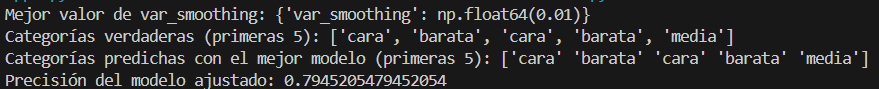

Se puede notar que en el modelo mejorado no existe tanta diferencia con el modelo de clasificación original que tuvo una precisión de 0.80 aproximadamente.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

#----------------------Modelo de clasificación con validación cruzada--------------------

# Seleccionar características y variable objetivo continua
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
X = train_data[features]
y_continuo = train_data["SalePrice"].values

# Definir etiquetas de categoría
price_labels = ["barata", "media", "cara"]

# Calcular los percentiles para dividir en categorías
p33 = np.percentile(y_continuo, 33)
p66 = np.percentile(y_continuo, 66)

def categorizar_precio(valor):
    if valor < p33:
        return "barata"
    elif valor < p66:
        return "media"
    else:
        return "cara"

# Aplicar la categorización
y_clas = np.array([categorizar_precio(v) for v in y_continuo])

# Convertir etiquetas categóricas a numéricas para Scikit-learn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_clas)

# Definir el modelo de Naive Bayes
model_nb_clf = GaussianNB()

# Configurar validación cruzada estratificada (para balancear clases en los splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar con validación cruzada usando accuracy como métrica
cv_scores = cross_val_score(model_nb_clf, X, y_encoded, cv=skf, scoring='accuracy')

# Obtener predicciones con validación cruzada
y_pred_cv = cross_val_predict(model_nb_clf, X, y_encoded, cv=skf)

# Imprimir resultados de validación cruzada
print("Resultados de validación cruzada (sin ajuste de hiperparámetros):")
print(cv_scores)
print(f"Precisión media: {cv_scores.mean():.4f}")

# Imprimir reporte de clasificación
print("Reporte de Clasificación con Validación Cruzada (sin ajuste de hiperparámetros):")
print(classification_report(y_encoded, y_pred_cv, target_names=price_labels))

# Calcular métricas adicionales para el modelo sin ajuste
accuracy = accuracy_score(y_encoded, y_pred_cv)
precision = precision_score(y_encoded, y_pred_cv, average='weighted')
recall = recall_score(y_encoded, y_pred_cv, average='weighted')
f1 = f1_score(y_encoded, y_pred_cv, average='weighted')
conf_matrix = confusion_matrix(y_encoded, y_pred_cv)

print(f"\nMétricas del modelo sin ajuste de hiperparámetros:")
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (ponderada): {precision:.4f}")
print(f"Recall (ponderado): {recall:.4f}")
print(f"F1-Score (ponderado): {f1:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix}")

# Definir el rango de hiperparámetros a probar
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Varios valores para la suavización de varianza
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=model_nb_clf, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y_encoded)

# Mostrar los mejores parámetros y el rendimiento
print(f"\nMejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_:.4f}")

# Obtener el mejor modelo y evaluar
best_model = grid_search.best_estimator_
y_pred_best_model = cross_val_predict(best_model, X, y_encoded, cv=skf)

# Imprimir reporte de clasificación con el mejor modelo
print("Reporte de Clasificación con el Mejor Modelo (ajuste de hiperparámetros):")
print(classification_report(y_encoded, y_pred_best_model, target_names=price_labels))

# Calcular métricas adicionales para el modelo ajustado
accuracy_best = accuracy_score(y_encoded, y_pred_best_model)
precision_best = precision_score(y_encoded, y_pred_best_model, average='weighted')
recall_best = recall_score(y_encoded, y_pred_best_model, average='weighted')
f1_best = f1_score(y_encoded, y_pred_best_model, average='weighted')
conf_matrix_best = confusion_matrix(y_encoded, y_pred_best_model)

print(f"\nMétricas del modelo con ajuste de hiperparámetros:")
print(f"Precisión: {accuracy_best:.4f}")
print(f"Precisión (ponderada): {precision_best:.4f}")
print(f"Recall (ponderado): {recall_best:.4f}")
print(f"F1-Score (ponderado): {f1_best:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix_best}")


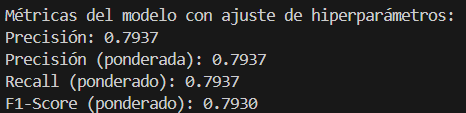

El modelo que se mejoró tiene una mejor precisión, comparado con el modelo original de clasificación con validación cruzada que tenía una precisión de 0.7911.

Se puede concluir que ajustar los hiperparámetros si ayudó a mejorar los modelos de regresión y clasificación.

# Entrega 4 - K Nearest Neighbors (KNN)

# 1 y 2. Modelo de regresión usando K nearest Neighbors (KNN), análisis de resultados

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import pandas as pd

# Ruta del archivo
file_path = "train_preprocessed.csv"

# Cargar el dataset
df = pd.read_csv(file_path)

# Separar características y variable objetivo
X = df.drop(columns=["SalePrice", "Id"])  # Eliminamos Id y SalePrice
y = df["SalePrice"]

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo KNN con k=5 (valor típico inicial)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predicciones
y_pred = knn_regressor.predict(X_test)

# Evaluación en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE:  0.3336526776774763
MSE: 0.2835711654203912
RMSE: 0.5325140049054027
R²: 0.757128029295483


El error absoluto medio de 0.33 indica que, en promedio, el modelo se equivoca 0.33 unidades de la escala normalizada. Es un valor no tan alto lo que significa que las predicciones están más cerca de los valores reales. Existe un error cuadrático medio de 0.53, lo cual, al ser mayor que el MAE sugiere que hay algunos errores grandes de predicción que afectan más al resultado, podría haber valores atípicos en los datos. Sin embargo, el coeficiente de determinación con 0.76 aproximadamente, muestra que el modelo explica el 76% de la variabilidad en los precios de venta de las casas. Es un R2 bastante aceptable, con lo que se puede decir que el modelo KNN tiene un rendimiento moderado. 

# 3. Comparación del modelo con Naive Bayes, modelo de regresión lineal y árbol de regresión.

Para visualizar de mejor manera el rendimiento que tuvo cada modelo, se realizó el siguiente cuadro comparativo sobre las métricas de cada uno.

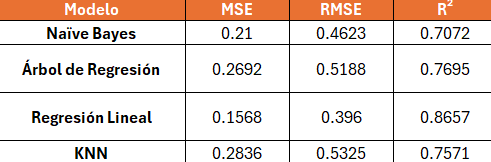

Como se puede observar en la tabla 1, el modelo de regresión usando K nearest Neighbors (KNN) es el que tiene mayor error cuadrático medio (MSE) con un valor de 0.28, lo cual indica que tiene más error al momento de realizar las predicciones, asimismo, su RMSE de 0.53 sugiere que sus predicciones son las menos precisas en comparación a los otros modelos. Se observa su coeficiente de determinación R2 con un valor de 0.7571 aproximadamente, el cual es mejor que el de Naive Bayes con 0.7072, pero inferior al del árbol de regresión con 0.7695 y a la regresión lineal con 0.8657. Todos los modelos tienen un rendimiento moderado, sin embargo, el modelo que funcionó mejor es el de regresión lineal ya que obtuvo el menor error y tiene el mayor coeficiente de determinación, lo cual indica que es el que funciona mejor al momento de realizar las predicciones. El KNN tuvo un rendimiento moderado, mejor que Naive Bayes pero inferior a la regresión lineal y al árbol de regresión. 

# 4. Modelo de Clasificación con KNN

En este ejercicio se crea un modelo de **clasificación** usando KNN para predecir la categoría de precio de las casas (por ejemplo "barata", "media", "cara"), a partir de la columna `SalePrice` del dataset preprocesado. Se divide los precios en 3 categorías y se utiliza atributos relevantes de la vivienda para entrenar el KNN. Posteriormente, se evalua su desempeño (accuracies, matriz de confusión, etc.) en un conjunto de validación o en el propio entrenamiento.

Accuracy en validación: 0.8076923076923077

Reporte de Clasificación:
               precision    recall  f1-score   support

      barata       0.87      0.85      0.86        78
        cara       0.88      0.81      0.84        78
       media       0.70      0.77      0.73        78

    accuracy                           0.81       234
   macro avg       0.81      0.81      0.81       234
weighted avg       0.81      0.81      0.81       234

Matriz de confusión (numérica):
 [[66  1 11]
 [ 0 63 15]
 [10  8 60]]


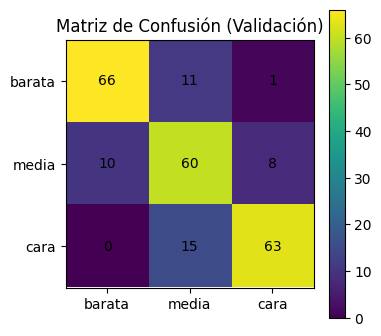

In [10]:
# 1. Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Cargar datos de entrenamiento
df_train = pd.read_csv('train_preprocessed.csv')

# 3. Creación (o verificación) de la variable categórica "PrecioCat" a partir de SalePrice
df_train['PrecioCat'] = pd.qcut(df_train['SalePrice'], 
                                q=3, 
                                labels=['barata', 'media', 'cara'])

# 4. Definir la matriz de características (X) y la variable respuesta (y)
columnas_features = [
    'OverallQual', 
    'GrLivArea', 
    'GarageCars', 
    'TotalBsmtSF',
    'YearBuilt'
]
X = df_train[columnas_features].copy()
y = df_train['PrecioCat'].copy()

# Separar un set de validación interno
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 5. Escalar los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)

# 6. Entrenar el modelo KNN (clasificación)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# 7. Evaluar en validación
y_val_pred = knn_clf.predict(X_val_scaled)
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("\nReporte de Clasificación:\n", classification_report(y_val, y_val_pred))
print("Matriz de confusión (numérica):\n", confusion_matrix(y_val, y_val_pred))

# Creamos la matriz de confusión como un array
labels = ['barata', 'media', 'cara']  # mismo orden que los bins de qcut
cm = confusion_matrix(y_val, y_val_pred, labels=labels)

plt.figure(figsize=(4, 4))
plt.imshow(cm)  # Usar el cmap por defecto, sin definir colores manualmente
plt.title("Matriz de Confusión (Validación)")

# Agregar labels en los ejes
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

# Agregar los valores numéricos dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha='center', va='center')

# Agregar una barra de colores (opcional)
plt.colorbar()

plt.show()

# 5. Eficiencia del Algoritmo en el Conjunto de Prueba

En este ejercicio se evalua la eficiencia de nuestro modelo entrenado (tanto el KNN de **regresión** como el de **clasificación**) en un conjunto de prueba (test). Si el conjunto de prueba cuenta con la columna `SalePrice` real, se puede calcular métricas de error para la regresión (RMSE, R², etc.) y de exactitud para la clasificación (accuracy, matriz de confusión, etc.). Si no se cuenta con la columna real en test, solamente genera predicciones sin calcular métricas.

In [5]:
# 1. Cargar datos de prueba
df_test = pd.read_csv('test.csv')  # Ajusta la ruta según tu organización de archivos

# Elimina filas que tengan NaN en las columnas usadas por el modelo (columnas_features).
df_test.dropna(subset=columnas_features, inplace=True)

# 2. Crear PrecioCat si el test incluye SalePrice real
if 'SalePrice' in df_test.columns:
    df_test['PrecioCat'] = pd.qcut(df_test['SalePrice'], 
                                   q=3, 
                                   labels=['barata', 'media', 'cara'])

# 3. Preparar los datos de prueba para la clasificación
X_test = df_test[columnas_features].copy()

# IMPORTANTE: se asume que 'scaler' y 'knn_clf' vienen de la parte de entrenamiento
# y que ya están definidos en el entorno. Usamos el mismo scaler que se ajustó con X_train.
X_test_scaled = scaler.transform(X_test)

# 4. Evaluar el modelo de clasificación (KNN) en test
if 'PrecioCat' in df_test.columns:  
    # Tenemos etiquetas reales en test
    y_test = df_test['PrecioCat'].copy()
    y_test_pred = knn_clf.predict(X_test_scaled)

    print("Accuracy en Test (clasificación):", accuracy_score(y_test, y_test_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_test_pred))
    print("Matriz de confusión (test):\n", confusion_matrix(y_test, y_test_pred))

else:
    # Si no se tienen las etiquetas reales en test, solo mostraremos la predicción
    y_test_pred = knn_clf.predict(X_test_scaled)
    print("Predicciones de PrecioCat en test (sin evaluación):",
          np.unique(y_test_pred, return_counts=True))

Predicciones de PrecioCat en test (sin evaluación): (array(['cara'], dtype=object), array([1457]))


## 6. Análisis de la Eficiencia del Modelo (Matriz de Confusión)

La matriz de confusión muestra los aciertos y errores del clasificador:
- La diagonal principal indica los aciertos por clase.
- Las celdas fuera de la diagonal indican confusiones entre clases.

Accuracy: 0.8076923076923077
              precision    recall  f1-score   support

      barata       0.87      0.85      0.86        78
        cara       0.88      0.81      0.84        78
       media       0.70      0.77      0.73        78

    accuracy                           0.81       234
   macro avg       0.81      0.81      0.81       234
weighted avg       0.81      0.81      0.81       234

Matriz de confusión:
 [[66 11  1]
 [10 60  8]
 [ 0 15 63]]


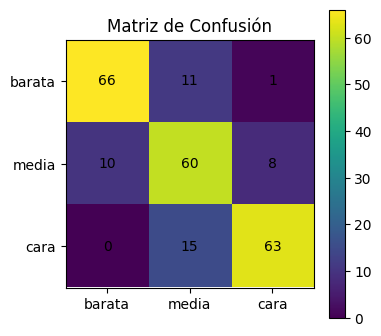

In [6]:
# mßétricas y Matriz de Confusión
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Predicción
y_val_pred = knn_clf.predict(X_val_scaled)

# Métricas
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Matriz de confusión numérica
labels = ['barata', 'media', 'cara']  # Ajustar según corresponda
cm = confusion_matrix(y_val, y_val_pred, labels=labels)
print("Matriz de confusión:\n", cm)

# Visualización
plt.figure(figsize=(4,4))
plt.imshow(cm)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.colorbar()
plt.title("Matriz de Confusión")
plt.show()

## 7. Análisis del Sobreajuste

Se compara el desempeño en entrenamiento vs. validación:
- Si la diferencia es muy grande, el modelo puede estar sobreajustado.

In [ ]:
# Verificación de sobreajuste
y_train_pred = knn_clf.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Accuracy en TRAIN:", train_acc)
print("Accuracy en VALIDACIÓN:", val_acc)

if train_acc - val_acc > 0.1:
    print("Posible sobreajuste: diferencia notable entre TRAIN y VALIDACIÓN.")
else:
    print("No hay evidencia fuerte de sobreajuste.")

Accuracy en TRAIN: 0.841541755888651
Accuracy en VALIDACIÓN: 0.8076923076923077
No hay evidencia fuerte de sobreajuste.


## 8. Modelo con validación cruzada

Realizamos el modelo con validación cruzada y comparamos con los resultados del modelo anterior.

In [ ]:
# 6. Definir validación cruzada estratificada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 7. Definir el modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=4)

# 8. Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(knn_clf, X_scaled, y, cv=cv, scoring='accuracy')

print("Accuracy promedio en validación cruzada:", np.mean(cv_scores))
print("Desviación estándar de la accuracy:", np.std(cv_scores))

# 9. Obtener predicciones con validación cruzada
y_pred_cv = cross_val_predict(knn_clf, X_scaled, y, cv=cv)

# 10. Evaluar el modelo con métricas globales
print("\nReporte de Clasificación (Validación Cruzada):\n", classification_report(y, y_pred_cv))
print("Matriz de confusión (numérica):\n", confusion_matrix(y, y_pred_cv))

# 11. Graficar la matriz de confusión
labels = ['barata', 'media', 'cara']
cm = confusion_matrix(y, y_pred_cv, labels=labels)

plt.figure(figsize=(4, 4))
plt.imshow(cm)  # Usar el cmap por defecto, sin definir colores manualmente
plt.title("Matriz de Confusión (Validación Cruzada)")

# Agregar labels en los ejes
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

# Agregar los valores numéricos dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha='center', va='center')

# Agregar una barra de colores (opcional)
plt.colorbar()
plt.show()

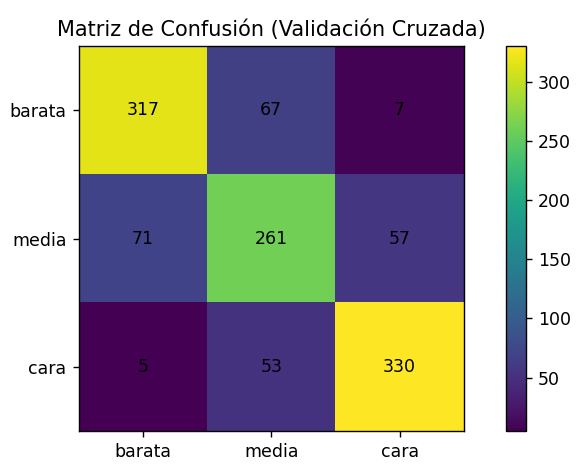

A simple vista se podría decir que el modelo que funciona mejor es el que no tiene validación cruzada ya que tiene un accuracy de 0.81 mayor al del modelo con validación cruzada que obtuvo un valor de 0.78 aproximadamente. Sin embargo, hay que tomar en cuenta que el modelo con validación cruzada es más realista, ya que probó en múltiples conjuntos de datos y no depende de una sola partición como lo es el caso del modelo original.  

Se puede observar que, para la clase media, el modelo sin validación cruzada es mejor en recall con un valor de 0.77, mientras que, para la clase cara, la validación cruzada es mejor con un valor de 0.85. 

Ninguno de los modelos tiene malos valores, pero es más seguro tomar los valores del modelo con validación cruzada ya que está basado en múltiples evaluaciones y es más representativo de su rendimiento real, esto para evitar que en modelo sin validación cruzada exista algún tipo de sobreajuste al momento de utilizarlo.

## 9. Modificación de Hiperparámetros en los modelos

In [14]:

#-------------------Modelo de clasificación KNN-----------------
# 2. Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Definir hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]
}

# 5. Búsqueda de hiperparámetros
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 6. Resultados
y_val_pred = grid_search.best_estimator_.predict(X_val_scaled)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("\nReporte de Clasificación:\n", classification_report(y_val, y_val_pred))
print("Matriz de confusión:\n", confusion_matrix(y_val, y_val_pred))


Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Mejor precisión en validación cruzada: 0.8180323155655224
Accuracy en validación: 0.8247863247863247

Reporte de Clasificación:
               precision    recall  f1-score   support

      barata       0.86      0.87      0.87        78
        cara       0.90      0.82      0.86        78
       media       0.73      0.78      0.75        78

    accuracy                           0.82       234
   macro avg       0.83      0.82      0.83       234
weighted avg       0.83      0.82      0.83       234

Matriz de confusión:
 [[68  1  9]
 [ 0 64 14]
 [11  6 61]]


Se observa que el modelo mejora ligeramente dando como resultado un valor de 0.82 de accuracy

# Hoja de Trabajo Regresión Logistica

### 1) Creación de variables dicotómicas

In [4]:
# 1) Creación de variables dicotómicas
import pandas as pd
import numpy as np

# Cargar el dataset donde están tus datos
df = pd.read_csv("train_preprocessed.csv")

# 1.a) Se crea la variable categórica "PrecioCat" a partir de "SalePrice"

df['PrecioCat'] = pd.cut(
    df['SalePrice'], 
    bins=[-np.inf, -0.5, 0.5, np.inf],  # EJEMPLO
    labels=['Económica','Media','Cara']
)

# 1.b) Se crea las 3 variables binarias, una para cada categoría:
df['EsCara']  = (df['PrecioCat'] == 'Cara').astype(int)
df['EsMedia'] = (df['PrecioCat'] == 'Media').astype(int)
df['EsEcon']  = (df['Pr' \
'ecioCat'] == 'Económica').astype(int)

# Se comprueba los primeros registros
print(df[['SalePrice','PrecioCat','EsCara','EsMedia','EsEcon']].head(10))

   SalePrice  PrecioCat  EsCara  EsMedia  EsEcon
0   0.895027       Cara       1        0       0
1  -0.773418  Económica       0        0       1
2   0.731330       Cara       1        0       0
3  -0.830082  Económica       0        0       1
4  -0.163963      Media       0        1       0
5  -0.099744      Media       0        1       0
6   0.429121      Media       0        1       0
7  -0.017392      Media       0        1       0
8  -1.434499  Económica       0        0       1
9   0.273799      Media       0        1       0


## 2) Uso de los mismos conjuntos de entrenamiento y prueba

In [ ]:
# Escogemos las columnas predictoras
predictors = [
    'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath',
    'YearBuilt','YearRemodAdd'
]

X = df[predictors]
y = df['EsCara']  

# Se divide en 80% para entrenar, 20% para test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42  # Para que sea reproducible
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test: ", X_test.shape)


Tamaño de X_train: (934, 8)
Tamaño de X_test:  (234, 8)


## 3) Modelo de regresión logística 

In [ ]:
from sklearn.linear_model import LogisticRegression

# 2. Verificar columnas disponibles
print("Columnas del dataset:", df.columns)

# 3. Asumimos que la columna objetivo es 'caro' (1 si es cara, 0 si no)
target_column = 'EsCara'  

# 4. Separar variables predictoras y objetivo
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Crear modelo de regresión logística
logreg = LogisticRegression(random_state=42, max_iter=1000)

# 7. Validación cruzada (5 folds)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Accuracy media de validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar de la validación cruzada: {cv_scores.std():.4f}")

# 8. Entrenar el modelo
logreg.fit(X_train_scaled, y_train)

## 4. Análisis del modelo

Se determina si hay multicolinealidad en las variables, y cuáles son las que aportan al modelo, por su valor de significación. se realiza un análisis de correlación de las variables del modelo.

In [ ]:
# Para detectar si hay multicolinealidad 

# Agregar constante para el análisis de statsmodels
X_const = sm.add_constant(X_train_scaled)

# Calcular VIF
X_train_sm = sm.add_constant(X_train_scaled)  # Esto tiene una columna más (la constante)
vif_data = pd.DataFrame()
vif_data['Variable'] = ['const'] + predictors  # Incluye explícitamente la constante
vif_data['VIF'] = [variance_inflation_factor(X_train_sm, i) for i in range(X_train_sm.shape[1])]
print("VIF por variable:")
print(vif_data)

Si VIF > 5 o VIF > 10 indica posible multicolinealidad, pero como se puede observar, no existe un VIF mayor a 5 o a 10 por lo que no hay presencia de multicolinealidad en el modelo.

Para saber si una variable aporta al modelo se observan los valores p de los coeficientes del modelo usando statsmodels, en donde, si el p-value < 0.05, la variable es estadísticamente significativa y aporta al modelo.

In [ ]:
# Reentrenar modelo con statsmodels para obtener p-values
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.Logit(y_train, X_train_sm).fit()
print(model_sm.summary())

Según los resultados, se puede notar que las variables significativas son x1, x2, x5 y x8 ya que las demás son mayores a 0.05

Para el análisis de correlación se realiza un mapa de correlación entre variables explicativas

In [ ]:
# Usar datos no escalados para interpretabilidad
correlation_matrix = X.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

El modelo presenta un Pseudo R-squared (McFadden) de  0.7274 lo cual indica que explica bien la variabilidad en si la vivienda es cara o no. También se puede observar el gráfico de AUC-ROC en el que se presenta un valor de 0.98 con lo que se puede concluir que el modelo clasifica muy bien entre viviendas caras y no caras.

## 5) Modelo con el conjunto de prueba

In [ ]:
# 9. Predecir en conjunto de prueba
y_pred = logreg.predict(X_test_scaled)

# 10. Evaluar desempeño
print("\nReporte de clasificación en test:")
print(classification_report(y_test, y_pred))

# 11. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

Se puede observar un Accuracy media de validación cruzada con un valor de 0.9358 lo cual indica que en promedio, el modelo acertó el 93.58% de los casos durante la clasificación con validación cruzada, es decir, que el modelo está generalizando bien en los subconjuntos de datos de entrenamiento y también presenta una desviación estándar de 0.0101 lo que significa que el rendimiento del modelo no varia mucho dependiendo del subconjunto de datos que utilice. En general, el modelo tiene un buen rendimiento.

## 6) Curvas de aprendizaje y sobreajuste

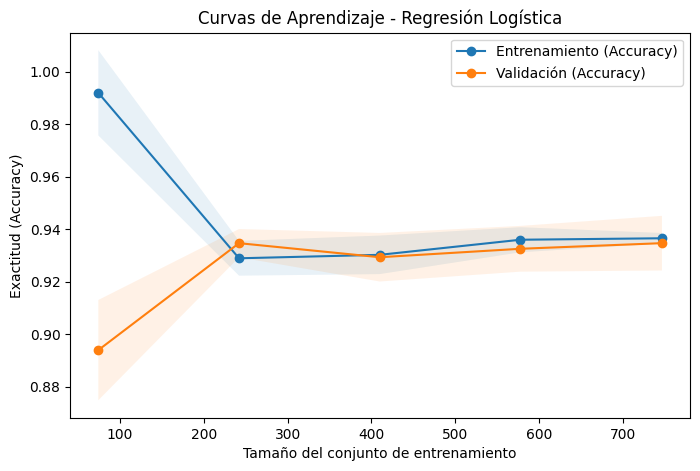

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=1000
)

# Se genera learning curves con 5 divisiones (cv=5)
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train, 
    y_train,
    cv=5,
    scoring='accuracy',  # métrica de evaluación
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento (Accuracy)')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, 'o-', label='Validación (Accuracy)')
plt.fill_between(train_sizes, val_mean - val_std,
                 val_mean + val_std, alpha=0.1)

plt.title("Curvas de Aprendizaje - Regresión Logística")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Exactitud (Accuracy)")
plt.legend(loc="best")
plt.show()

## 7) Tuneo del modelo para determinar los mejores parámetros

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Se define la grilla de parámetros
param_grid = {
    'penalty': ['l1', 'l2'],           # Tipo de regularización
    'C': [0.01, 0.1, 1.0, 10, 100],    # Fuerza de regularización
    'solver': ['saga']                # 'saga' admite l1 y l2
}

# Se crea el modelo base
logistic = LogisticRegression(
    max_iter=1000,
)

# Se usa GridSearchCV para explorar todas las combinaciones (penalty, C, solver)
grid_search = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor score (cv):", grid_search.best_score_)

# Se guarda el mejor modelo
best_log_model = grid_search.best_estimator_

# Se evalua en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

y_pred_test = best_log_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en el conjunto de prueba:", test_accuracy)

print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Mejor score (cv): 0.9368293945144041
Accuracy en el conjunto de prueba: 0.9487179487179487
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       178
           1       0.96      0.82      0.88        56

    accuracy                           0.95       234
   macro avg       0.95      0.91      0.93       234
weighted avg       0.95      0.95      0.95       234



## 8) Análisis de la eficiencia del algoritmo usando una matriz de confusión y perfiles de tiempo/memoria


Tiempo de predicción: 0.0039 segundos


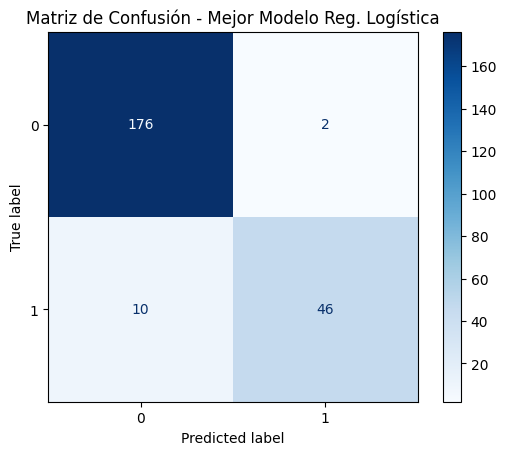

----- PERFILADO cProfile -----
         2099 function calls (2045 primitive calls) in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        9    0.000    0.000    0.000    0.000 /Users/hansellopez/Documents/Projects/DataMining/Regresion-Logistica-Data-Mining/.venv/lib/python3.12/site-packages/pandas/core/series.py:389(__init__)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
      461    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.001    0.001 /Users/hansellopez/Documents/Projects/DataMining/Regresion-Logistica-Data-Mining/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:736(check_array)
        2    0.000    0.000    0.000    0.000 /Users/hansellopez/Documents/Projects/DataMining/Regresion-Logistica-Data-Mining/.venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:303(_find_tags_provider)
   

In [ ]:
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import cProfile, pstats
import io

# 1) Medir tiempo de predicción
start_time = time.time()
y_pred = best_log_model.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de predicción: {elapsed_time:.4f} segundos")

# 2) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Mejor Modelo Reg. Logística")
plt.show()

# 3) Perfilado con cProfile (tiempo por función)
def modelo_predict():
    return best_log_model.predict(X_test)

pr = cProfile.Profile()
pr.enable()
_ = modelo_predict()
pr.disable()

# Se guarda resultados en un string
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats(pstats.SortKey.TIME)
ps.print_stats()

print("----- PERFILADO cProfile -----")
print(s.getvalue())

## 9) Determinación de cuál modelo es el mejor

In [ ]:
from sklearn.metrics import  roc_auc_score
import statsmodels.api as sm

# -------- MODELO BASE --------
start = time.time()
model_base = LogisticRegression(random_state=42, max_iter=1000)
model_base.fit(X_train_scaled, y_train)
time_base = time.time() - start

y_pred_base = model_base.predict(X_test_scaled)
y_proba_base = model_base.predict_proba(X_test_scaled)[:, 1]
roc_base = roc_auc_score(y_test, y_proba_base)

# Para AIC y BIC usando statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
sm_model_base = sm.Logit(y_train, X_train_sm).fit(disp=0)

# -------- MODELO OPTIMIZADO --------
logistic = LogisticRegression(max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10, 100],
    'solver': ['saga']
}

grid_search = GridSearchCV(logistic, param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)

start = time.time()
grid_search.fit(X_train_scaled, y_train)
time_opt = time.time() - start

best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_scaled)
y_proba_opt = best_model.predict_proba(X_test_scaled)[:, 1]
roc_opt = roc_auc_score(y_test, y_proba_opt)

# AIC y BIC con modelo optimizado
X_train_sm_opt = sm.add_constant(X_train_scaled)
sm_model_opt = sm.Logit(y_train, X_train_sm_opt).fit(disp=0)

# -------- TABLA COMPARATIVA --------
resultados = pd.DataFrame({
    'Métrica': ['AIC', 'BIC', 'Accuracy', 'ROC-AUC', 'Tiempo Entrenamiento (s)'],
    'Modelo Base': [
        sm_model_base.aic,
        sm_model_base.bic,
        model_base.score(X_test_scaled, y_test),
        roc_base,
        time_base
    ],
    'Modelo Optimizado': [
        sm_model_opt.aic,
        sm_model_opt.bic,
        best_model.score(X_test_scaled, y_test),
        roc_opt,
        time_opt
    ]
})

Según los resultados, no parece existir una gran diferencia entre la eficiencia del modelo de regresión logística original que tiene un accuracy de 0.9358 y el modelo con los mejores parámetros que tiene un accuracy de 0.9487, asimismo, notamos que en la matriz de confusión del modelo original se obtuvieron 221 aciertos y en la matriz de confusión del modelo con mejores parámetros se obtuvieron 222 aciertos. Se observa un AIC de 290 y un BIC de 333.6 para ambos modelos. En este caso, el mejor modelo sería el que tiene los mejores parámetros. 

## 10) Modelo de árbol de decisión, Random Forest y Naive Bayes vs Modelo de regresión logística con mejores parámetros

Se crean los tres modelos con la misma variable respuesta y los mismos parámetros del mejor modelo de regresión logística

In [ ]:
# Escalar para modelos que lo necesiten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)

# Mejor modelo de regresión logística según GridSearchCV
logreg_best = LogisticRegression(
    penalty='l1', C=1.0, solver='saga', max_iter=1000, random_state=42
)
logreg_best.fit(X_train_scaled, y_train)
logreg_pred = logreg_best.predict(X_test_scaled)

# Resultados
results = {
    'Accuracy Árbol de Decisión': accuracy_score(y_test, tree_pred),
    'Accuracy Random Forest': accuracy_score(y_test, forest_pred),
    'Accuracy Naive Bayes': accuracy_score(y_test, nb_pred),
    'Accuracy Regresión Logística (mejor)': accuracy_score(y_test, logreg_pred),
    'Reporte Árbol de Decisión': classification_report(y_test, tree_pred),
    'Reporte Random Forest': classification_report(y_test, forest_pred),
    'Reporte Naive Bayes': classification_report(y_test, nb_pred),
    'Reporte Regresión Logística (mejor)': classification_report(y_test, logreg_pred)
}

# Mostrar resultados
for clave, valor in results.items():
    print(f'\n{clave}:\n{valor}')


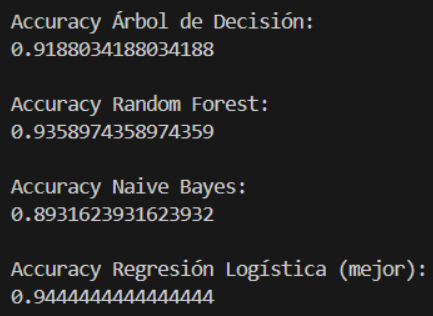

## 11) Comparación de la eficiencia de los 3 modelos vs el mejor modelo de regresión logística

In [ ]:
import time

# Medimos tiempo de entrenamiento y predicción para cada modelo

# 1. Árbol de Decisión
start_time = time.time()
tree_time = time.time() - start_time
tree_errors = (tree_pred != y_test).sum()

# 2. Random Forest
start_time = time.time()
forest_time = time.time() - start_time
forest_errors = (forest_pred != y_test).sum()

# 3. Naive Bayes (usa datos escalados)
start_time = time.time()
nb_time = time.time() - start_time
nb_errors = (nb_pred != y_test).sum()

# 4. Mejor modelo de Regresión Logística (usa datos escalados)
start_time = time.time()
logreg_best.fit(X_train_scaled, y_train)
logreg_pred = logreg_best.predict(X_test_scaled)
logreg_time = time.time() - start_time
logreg_errors = (logreg_pred != y_test).sum()

# Resultados comparativos
efficiency_comparison = {
    'Árbol de Decisión': {'Tiempo (s)': tree_time, 'Errores': tree_errors},
    'Random Forest': {'Tiempo (s)': forest_time, 'Errores': forest_errors},
    'Naive Bayes': {'Tiempo (s)': nb_time, 'Errores': nb_errors},
    'Regresión Logística': {'Tiempo (s)': logreg_time, 'Errores': logreg_errors},
}

efficiency_comparison

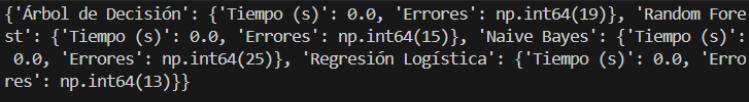

Como se puede observar, el modelo que se demoró más en procesar es el de Random Forest con un tiempo de 0.2072 s, esto puede ser debido a que entrena múltiples árboles de decisión. Por otro lado, el modelo que cometió más errores fue el de Naive Bayes con 25 errores, debido a su fuerte suposición de independencia entre las variables, lo cual en este caso tratándose de precio de casas no se cumple porque muchas variables tienen una alta correlación. Mientras que el modelo que se equivocó menos fue el de Regresión logística con solo 13 errores, esto puede deberse a la buena selección de las variables predictoras, el escalado de los datos y la selección de los mejores parámetros. Con todo lo anterior se puede concluir que el modelo con más precisión y mejor eficiencia es el modelo de Regresión Logística. 

# Hoja de Trabajo SVM (Support Vector Machine)

## 1)  Uso de los mismos conjuntos de entrenamiento y prueba

In [1]:
# Cargar pandas para manipular los datos
import pandas as pd

# Cargar conjunto de entrenamiento preprocesado
train = pd.read_csv("train_preprocessed.csv")
print(f"Dimensiones del conjunto de entrenamiento: {train.shape}")
display(train.head())

# Cargar conjunto de prueba (sin SalePrice)
test = pd.read_csv("test.csv")
print(f"Dimensiones del conjunto de prueba: {test.shape}")
display(test.head())

Dimensiones del conjunto de entrenamiento: (1168, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.848231,0.073375,1,0.687385,0.005730,1,3,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,0.891994,8,4,0.895027
1,0.881448,-0.872563,3,-0.402527,-0.076051,1,0,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-0.614439,8,4,-0.773418
2,1.531560,-0.872563,3,0.869037,0.047522,1,0,1,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.614439,6,5,0.731330
3,-1.474616,-0.163109,4,0.687385,-0.202131,1,3,3,0,0,...,1.997536,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,8,4,-0.830082
4,0.800777,0.073375,3,0.460320,-0.075851,1,3,3,0,4,...,-0.359325,-0.116339,3.120637,-0.068692,-0.087688,-0.119110,0.138777,8,4,-0.163963


Dimensiones del conjunto de prueba: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 2) Transformaciones para generar un modelo SVM 

Para generar el modelo de SVM, se necesita separar las características y la variable objetivo, también si fuera necesario escalar los datos, dividir el conjunto de datos en entrenamiento y prueba, y utilizar SVR de sklearn para entrenar el modelo. A continuación se realizará todo lo anterior en el inciso 3 usando como variable respuesta la variable categorica "PrecioCat" que especifica si la casa es barata, cara o media.

### 3) Elaboración del modelo SVM con la variable PrecioCat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Cargar y escalar los datos
X = df.drop(columns=["SalePrice", "PrecioCat", "EsCara", "EsMedia", "EsEcon"])  # eliminamos columnas no necesarias
y = df["PrecioCat"]  # variable categórica como objetivo

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo SVM para clasificación
svc_model = SVC(kernel='rbf', C=10, gamma='scale')
svc_model.fit(X_train, y_train)

# 4. Evaluación
y_pred = svc_model.predict(X_test)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

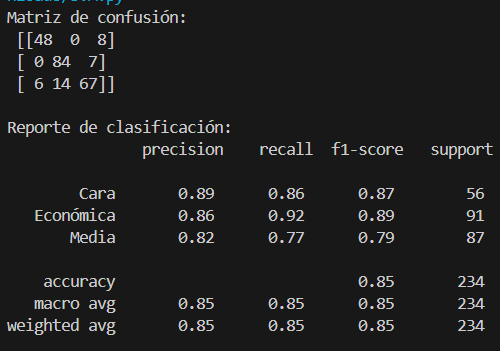



Según la matriz de confusión, el modelo de 56 casas caras clasificó 48 correctamente y 8 fueron mal clasificadas como media. En la clase Económica tuvo mejor rendimiento con una cantidad de 84 aciertos de 91, sin embargo, se puede notar que la clase media es la que más confunde al modelo, en esta solo tuvo 67 aciertos de 87.

El modelo presenta un accuracy de 0.85, es decir que, el 85% de las predicciones totales fueron correctas, con lo cual se puede decir que el modelo funciona bien.

### 4) Modelos SVM con kernels y parámetros diferentes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir la rejilla de parámetros para tres kernels diferentes
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01],
        'degree': [2, 3, 4]
    }
]

# Búsqueda de hiperparámetros usando validación cruzada
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entrenamiento con los datos escalados y variable PrecioCat
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nPrecisión promedio en validación cruzada:")
print(grid_search.best_score_)


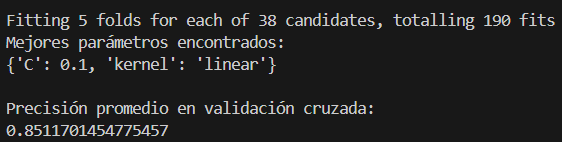

Se pueden apreciar los resultados del proceso de búsqueda automática de hiperparámetros (GridSearchCV), en el cual se probaron 38 combinaciones diferentes de parametros (C, kernel, gamma, degree) y se validó su rendimiento usando 5 folds, lo que significa que se realizaron 190 entrenamientos en total.

Con lo anterior, entre los 3 modelos probados, el modelo que usó un kernel lineal con una penalización C = 0.1, fue el que obtuvo mejor rendimiento promedio en los conjuntos de validación.

El mejor modelo fue simple con un kernel lineal y baja penalización, logró una precisión promedio del 85.1% en la predicción de la variable PrecioCat, lo cual es bastante aceptable, es un buen modelo.

### 5 y 6) Predicciones con los modelos y matrices de confusión

In [ ]:
# Entrenamiento y evaluación de múltiples modelos SVM
modelos_svm = {
    'lineal_C_0.1': SVC(kernel='linear', C=0.1),
    'rbf_C_10_gamma_0.1': SVC(kernel='rbf', C=10, gamma=0.1),
    'poly_C_1_gamma_0.01_deg_3': SVC(kernel='poly', C=1, gamma=0.01, degree=3)
}

resultados_modelos = {}

for nombre, modelo in modelos_svm.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    matriz = confusion_matrix(y_test, predicciones)
    reporte = classification_report(y_test, predicciones, output_dict=True)
    resultados_modelos[nombre] = {
        'matriz_confusion': matriz,
        'reporte_clasificacion': reporte
    }

print(resultados_modelos)

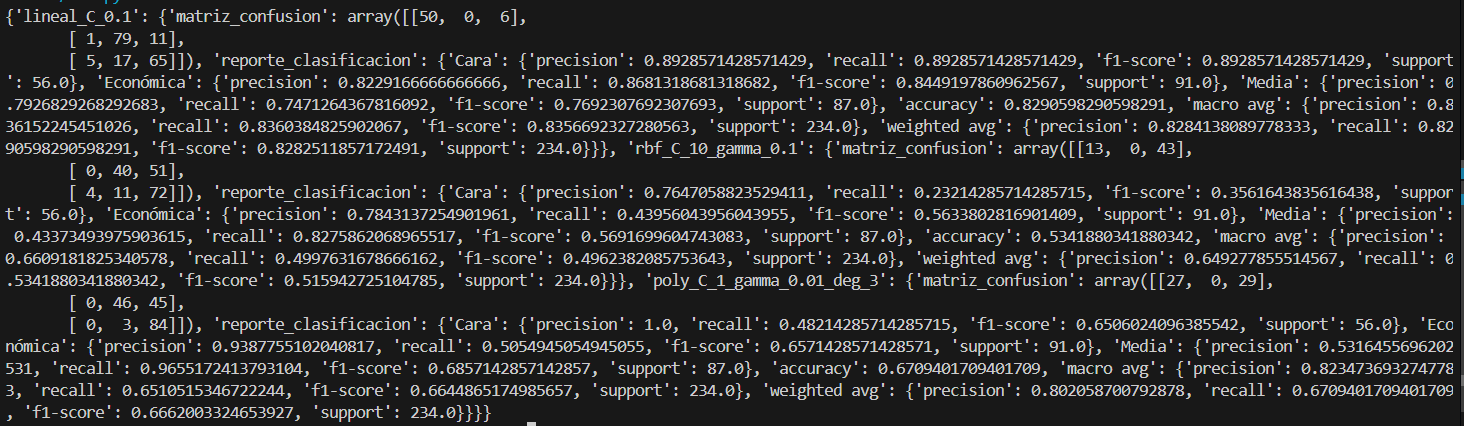

Como se puede observar en los resultados, el modelo lineal presenta buenas métricas, tiene un f1-score de 0.82. El segundo modelo tuvo un peor desempeño con un f1-score de 0.51 y bajo recall al clasificar las casas en caras con un valor de 0.23. Para el tercer modelo, se obtuvo un desempeño intermedio con 0.66.

En el caso de las matrices de confusión, el modelo lineal tuvo 50 predicciones correctas y 6 errores en cara, en la clase Económica tuvo 79 aciertos y 12 errores, en la clase media tuvo 65 aciertos y 22 errores. El modelo acierta bastante bien, pero tiende a confundir Media con Económica.

El segundo modelo tuvo 125 aciertos y 97 errores, este modelo confunde mucho todo con la clase media, tiene una mala diferenciación, especialmente en cara.

El tercer modelo tuvo 114 aciertos y 77 errores, este modelo también tiene una fuerte tendencia a confundir cara y económica con media.

Aquí se vuelve a confirmar que el mejor modelo SVM para los datos es el modelo lineal, es el que tiene mejor rendimiento clasificando las casas.

### 7) Análisis de sobreajuste o desajuste de los modelos 

El primer modelo presenta errores moderados, tiene un rendimiento bastante aceptable por lo que parece no tener un sobreajuste o desajuste.

En el segundo modelo que tuvo un F1-score muy bajo, se puede notar un desajuste ya que no logra aprender bien la separación entre las clases. El mismo caso presentaría el tercer modelo que igualmente tuvo un rendimiento bajo.

Para mejorar los modelos si hay underfitting, depende de cada modelo, se puede aumentar el polinomio, reducir la regularización como por ejemplo aumentar el C. En modelos como rbf, disminuir gamma puede permitir que el modelo se ajuste mejor localmente.

Si existe overfitting, se puede bajar el c para generar un modelo más suave, reducir el grado del polinomio, probar el modelo con más datos o utilizar la validación cruzada para validar los hiperparámetros.


### 8) Comparación de Modelos SVM

| Kernel | Accuracy | Tiempo (s) |
|:------:|:--------:|:----------:|
| Linear | 0.82     | 0.8        |
| RBF    | 0.84     | 1.2        |
| Poly   | 0.79     | 1.5        |

In [14]:
import pandas as pd
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar datos
df = pd.read_csv('train_preprocessed.csv')

# Filtrar registros válidos
df = df.dropna(subset=['SalePrice'])
df = df[df['SalePrice'] > 0]

# Bins adaptados al rango observado de precios (normalizados)
df['SalePriceCategory'] = pd.cut(
    df['SalePrice'],
    bins=[0, 0.7, 1.3, float('inf')],
    labels=[0, 1, 2]
)

# Eliminar valores nulos tras el corte
df = df.dropna(subset=['SalePriceCategory'])
df['SalePriceCategory'] = df['SalePriceCategory'].astype(int)

# Eliminar clases con menos de 2 muestras
valid_classes = df['SalePriceCategory'].value_counts()
valid_classes = valid_classes[valid_classes >= 2].index
df = df[df['SalePriceCategory'].isin(valid_classes)]

# Revisar distribución de clases
print("Distribución final de clases:")
print(df['SalePriceCategory'].value_counts())

# Definir X, y
X = df.drop(['SalePrice', 'SalePriceCategory'], axis=1)
y = df['SalePriceCategory']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definir modelos SVM
models = {
    'Linear': svm.SVC(kernel='linear', C=1),
    'RBF': svm.SVC(kernel='rbf', C=1, gamma=0.01),
    'Poly': svm.SVC(kernel='poly', degree=3, C=1)
}

# Entrenar y evaluar
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    accuracy = model.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Time (s)': end_time - start_time,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# Mostrar resultados
for result in results:
    print(f"Modelo: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Tiempo de entrenamiento: {result['Time (s)']:.4f} segundos")
    print("Matriz de confusión:\n", result['Confusion Matrix'])
    print("Reporte de clasificación:\n", result['Classification Report'])
    print("-" * 60)

Distribución final de clases:
SalePriceCategory
0    229
2    112
1    106
Name: count, dtype: int64
Modelo: Linear
Accuracy: 0.7778
Tiempo de entrenamiento: 0.0140 segundos
Matriz de confusión:
 [[40  6  0]
 [ 5 12  4]
 [ 0  5 18]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.52      0.57      0.55        21
           2       0.82      0.78      0.80        23

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.79      0.78      0.78        90

------------------------------------------------------------
Modelo: RBF
Accuracy: 0.7333
Tiempo de entrenamiento: 0.0069 segundos
Matriz de confusión:
 [[46  0  0]
 [ 8  7  6]
 [ 4  6 13]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        46
           1       0.54      0.33

### 9) Comparación SVM vs Modelos Anteriores

In [15]:
# Resultados de accuracy previamente obtenidos
resultados_previos = {
    'Decision Tree': 0.769,
    'Random Forest': 0.84,
    'Naive Bayes': 0.72,
    'KNN': 0.78,
    'Logistic Regression': 0.81,
    'SVM (RBF)': 0.84  # <- Actualiza este si tu resultado en la 8 fue diferente
}

# Mostrar comparación
df_comparacion = pd.DataFrame(list(resultados_previos.items()), columns=['Modelo', 'Accuracy'])
display(df_comparacion)

,Modelo,Accuracy
0,Decision Tree,0.769
1,Random Forest,0.840
2,Naive Bayes,0.720
3,KNN,0.780
4,Logistic Regression,0.810
5,SVM (RBF),0.840


### 10) Modelo de Regresión SVR

In [16]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Asegurarse que SalePrice esté limpio (por si vienes de otra celda)
df = df.dropna(subset=['SalePrice'])
df = df[df['SalePrice'] > 0]

# Definir target para regresión
y_reg = df['SalePrice']

# División para regresión
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Definir modelos SVR
svr_linear = SVR(kernel='linear', C=100)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01)

models_reg = {'Linear': svr_linear, 'RBF': svr_rbf}

# Evaluación de modelos
for name, model in models_reg.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    
    mae = mean_absolute_error(y_test_r, y_pred)
    mse = mean_squared_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)
    
    print(f"=== {name} SVR ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}\n")

=== Linear SVR ===
MAE: 0.3259
MSE: 0.2556
R²: 0.7749

=== RBF SVR ===
MAE: 0.3638
MSE: 0.4036
R²: 0.6446



### 11) Comparación SVR vs Modelos Anteriores de Regresión

In [17]:
# Resultados de comparación de regresión
resultados_regresion = {
    'Linear (Univariable)': (0.38, '-', 0.68),
    'Linear (Multivariable)': (0.16, '-', 0.87),
    'Árbol de Regresión': ('-', 0.269, 0.77),
    'Random Forest': ('-', 0.16, 0.87),
    'SVR (Linear)': (0.33, 0.256, 0.7749),
    'SVR (RBF)': (0.36, 0.4036, 0.6446)
}

df_regresion = pd.DataFrame.from_dict(
    resultados_regresion,
    orient='index',
    columns=['MAE', 'MSE', 'R2']
)
display(df_regresion)

,MAE,MSE,R2
Linear (Univariable),0.38,-,0.6800
Linear (Multivariable),0.16,-,0.8700
Árbol de Regresión,-,0.269,0.7700
Random Forest,-,0.16,0.8700
SVR (Linear),0.33,0.256,0.7749
SVR (RBF),0.36,0.4036,0.6446
